In [1]:
import time
import datetime
import os

import numpy as np
import pandas as pd
from dateutil.relativedelta import relativedelta
from pptx.chart.data import CategoryChartData
from pptx.enum.chart import XL_CHART_TYPE
from pptx.util import Inches
from pptx import Presentation
from pptx.dml.color import RGBColor
from pptx.chart.data import ChartData
from pptx.util import Pt
from pptx.enum.text import PP_ALIGN
from pptx.enum.text import MSO_ANCHOR
from pptx.enum.shapes import MSO_SHAPE



In [2]:
# 上一周
currentWeek = 1
# 当前年份 
currentYear = 2021

# 上一周的起始日期
st = '2021.1.03'
ed = '2021.1.10'


In [3]:
n = datetime.datetime.now()

n.isocalendar()

(2021, 2, 1)

In [4]:
# 城市能级 city_map

city_map = {
       "北京": "一二线","上海": "一二线","广州": "一二线","深圳": "一二线","南京": "一二线","苏州": "一二线","厦门": "一二线","合肥": "一二线",
        "天津": "一二线","武汉": "一二线","杭州": "一二线","福州": "一二线","济南": "一二线","南昌": "一二线","无锡": "一二线","宁波": "一二线",
        "成都": "一二线","郑州": "一二线","南宁": "一二线","长沙": "一二线","西安": "一二线","重庆": "一二线","青岛": "一二线","沈阳": "一二线",
        "大连": "一二线","常州": "一二线","徐州": "一二线","南通": "一二线","嘉兴": "三四线","绍兴": "三四线","温州": "一二线","镇江": "三四线",
        "泉州": "一二线","漳州": "三四线","佛山": "一二线","东莞": "一二线","中山": "三四线","惠州": "三四线","珠海": "一二线","安庆": "三四线",
        "株洲": "三四线","阜阳": "三四线","芜湖": "三四线","荆门": "三四线","荆州": "三四线","抚州": "三四线","赣州": "三四线","吉安": "三四线",
        "九江": "三四线","信阳": "三四线","南阳": "三四线","淄博": "三四线","临沂": "三四线","兰州": "一二线","昆明": "一二线","宝鸡": "三四线",
        "德阳": "三四线","哈尔滨": "一二线","湖州": "三四线","江门": "三四线","金华": "三四线","丽水": "三四线","龙岩": "三四线","泸州": "三四线",
        "马鞍山": "三四线","南平": "三四线","内江": "三四线","宁德": "三四线","莆田": "三四线","衢州": "三四线","三明": "三四线","汕头": "三四线",
        "石家庄": "一二线","台州": "三四线","泰州": "三四线","潍坊": "三四线","烟台": "一二线","盐城": "三四线","银川": "一二线","长春": "一二线",
        "肇庆": "三四线","茂名": "三四线","海口": "一二线","泰安": "三四线","威海": "三四线","包头": "三四线","舟山": "三四线","柳州": "三四线",
        "贵港": "三四线","天水": "三四线","淮南": "三四线","玉林": "三四线","牡丹江": "三四线","宣城": "三四线","张家界": "三四线","德州": "三四线",
        "日照": "三四线","淮北": "三四线","广元": "三四线","汉中": "三四线","绵阳": "三四线"}

# 城市类型
cityType = {
    '北京': '深耕型', '上海': '深耕型', '广州': '深耕型', '深圳': '深耕型', '南京': '深耕型', '苏州': '深耕型', '厦门': '深耕型', '合肥': '深耕型', '天津': '深耕型',
    '武汉': '深耕型', '杭州': '深耕型', '福州': '深耕型', '济南': '深耕型', '南昌': '深耕型', '无锡': '据点型', '宁波': '深耕型', '成都': '深耕型', '郑州': '深耕型',
    '南宁': '深耕型', '长沙': '深耕型', '西安': '深耕型', '重庆': '深耕型', '青岛': '深耕型', '沈阳': '深耕型', '大连': '深耕型', '常州': '据点型', '徐州': '深耕型',
    '南通': '据点型', '嘉兴': '据点型', '绍兴': '据点型', '温州': '深耕型', '镇江': '据点型', '泉州': '据点型', '漳州': '据点型', '佛山': '据点型', '东莞': '据点型',
    '中山': '据点型', '惠州': '据点型', '珠海': '深耕型', '安庆': '机会型', '株洲': '机会型', '阜阳': '据点型', '芜湖': '据点型', '荆门': '机会型', '荆州': '机会型',
    '抚州': '机会型', '赣州': '据点型', '吉安': '机会型', '九江': '据点型', '信阳': '机会型', '南阳': '机会型', '淄博': '据点型', '临沂': '据点型', '兰州': '深耕型',
    '昆明': '深耕型', '宝鸡': '机会型', '德阳': '机会型', '哈尔滨': '深耕型', '湖州': '据点型', '江门': '据点型', '金华': '据点型', '丽水': '据点型',
    '龙岩': '据点型', '泸州': '机会型', '马鞍山': '机会型', '南平': '机会型', '内江': '机会型', '宁德': '机会型', '莆田': '据点型', '衢州': '据点型',
    '三明': '机会型', '汕头': '据点型', '石家庄': '深耕型', '台州': '据点型', '泰州': '据点型', '潍坊': '据点型', '烟台': '据点型', '盐城': '据点型',
    '银川': '深耕型', '长春': '深耕型', '肇庆': '机会型', '茂名': '据点型', '海口': '深耕型', '泰安': '据点型', '威海': '据点型', '包头': '据点型', '舟山': '据点型',
    '柳州': '据点型', '贵港': '机会型', '天水': '机会型', '淮南': '机会型', '玉林': '机会型', '牡丹江': '机会型', '宣城': '机会型', '张家界': '机会型',
    '德州': '机会型', '日照': '机会型', '淮北': '机会型', '广元': '机会型', '汉中': '机会型', '绵阳': '机会型'
}

# 第一页PPT

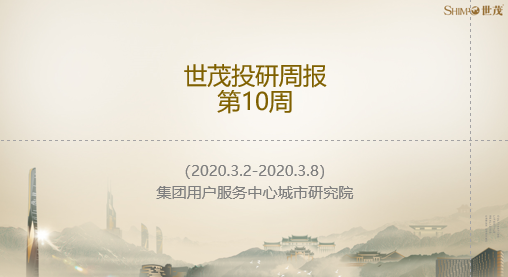

In [5]:
from pptx.chart.data import CategoryChartData
from pptx.enum.chart import XL_CHART_TYPE
from pptx.util import Inches
from pptx import Presentation
from pptx.dml.color import RGBColor
from pptx.chart.data import ChartData
from pptx.util import Pt
from pptx.enum.text import PP_ALIGN


path = './世茂土地周报_2020-3.pptx'
prs = Presentation(path)

i = 0
slide = prs.slides[0]
for j,shape in enumerate(slide.shapes):

    print('slides[%s]'%i+'.shapes[%s]'%j,shape.shape_type)
    if shape.has_text_frame:
        print(shape.text_frame.text)
    if shape.has_chart:
        print(shape.chart.chart_title.text_frame.text)
    print()

slides[0].shapes[0] PLACEHOLDER (14)
世 茂 投 研 周 报

slides[0].shapes[1] PLACEHOLDER (14)
集团用户服务中心城市研究院

slides[0].shapes[2] TEXT_BOX (17)
第10周

slides[0].shapes[3] TEXT_BOX (17)
（2020.3.2-2020.3.8）



In [6]:
# plpace.text    第10周
plpace = slide.shapes[2]
text = plpace.text.replace('第10周', str('第{}周'.format(currentWeek)))
plpace.text = text

font = plpace.text_frame.paragraphs[0].font
font.color.rgb = RGBColor(127, 96 ,0)
font.size = Pt(40)
font.name = '微软雅黑'
# font.bold = True    # 加粗



# （2020.3.2-2020.3.8）
plpace = slide.shapes[3]
text =  str('({}-{})'.format(st, ed))
plpace.text = text

font = plpace.text_frame.paragraphs[0].font
font.color.rgb = RGBColor(127, 127, 127 )
font.size = Pt(27)
font.name = '微软雅黑'



# 第二页PPT
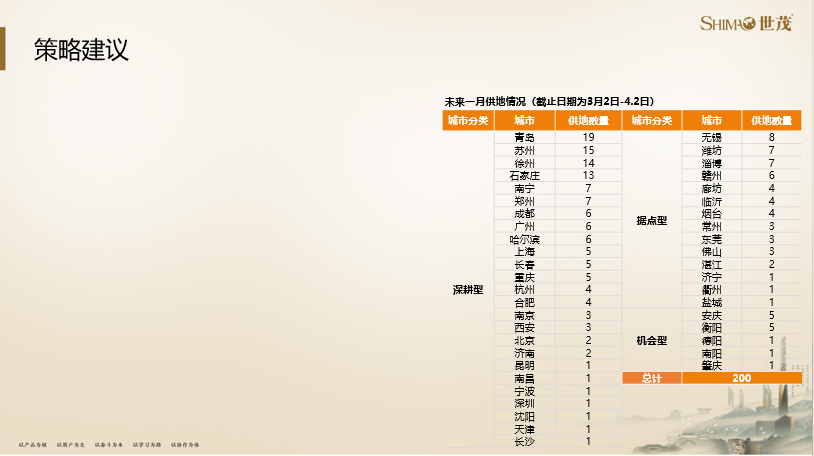

## 处理土地供应明细数据

In [7]:
gongying = pd.read_excel('./中指综合后的2016-2020数据.xlsx', sheet_name='土地供应明细')
gongying.fillna(0, inplace=True)
gongying['城市能级'] = gongying['城市'].map(lambda x: city_map.get(x))
gongying['城市分类'] = gongying['城市'].map(lambda x: cityType.get(x))
gongying['截止日期'] = pd.to_datetime(gongying['截止日期'])


# 筛选未来一个月的数据
futureSt = datetime.datetime.strptime('{}-{}-{}'.format(st.split('.')[0], st.split('.')[1], st.split('.')[2] ), '%Y-%m-%d')
futureSt = futureSt + relativedelta(days=7)
futureEd = futureSt + relativedelta(months=1)

gongying = gongying.query("截止日期>=@futureSt and 截止日期<=@futureEd")

display(futureSt, futureEd, gongying.shape, gongying.head(2))


datetime.datetime(2021, 1, 10, 0, 0)

datetime.datetime(2021, 2, 10, 0, 0)

(371, 20)

,年,月,周,地块名称,城市,用地性质,区县,出让方式,建设用地面积(㎡),规划建筑面积(㎡),容积率,截止日期,受让单位,起始价(万元),成交价(万元),成交楼面价(元/㎡),溢价率,土地星级,城市能级,城市分类
26059,2021,2,6,中山市石岐区富康北路,中山,住宅用地,石岐区,挂牌,13934.6,39016.88,≤2.8,2021-02-10,0,42528.4,0.0,0.0,0.0,5星,三四线,据点型
26060,2021,2,6,白沙园区白沙路北、青年路南、慧通路西、前程路东,郑州,综合用地(含住宅),郑东新区,挂牌,46990.6,131573.68,">1.0,<2.8",2021-02-10,0,40000.0,0.0,0.0,0.0,4星,一二线,深耕型


In [8]:
# 按照城市类型 进行透视
gongying_piovt = gongying.pivot_table(values='地块名称', index=['城市分类', '城市'],  aggfunc='count')

# 设置多重索引为列
gongying_piovt.reset_index(level=[0, 1], inplace=True)
gongying_piovt.rename(columns={'地块名称':'供地数量'}, inplace=True)



display(gongying_piovt.pivot_table(values='城市', index='城市分类', aggfunc='count'))


,城市
城市分类,
据点型,22
机会型,15
深耕型,29


处理数据

In [9]:
gongying_piovt.columns = ['城市分类', '城市', '供地数量']

In [10]:
# 分成两部分
# 深耕型 和 据点型 + 机会型
gongying_piovt_1 = gongying_piovt.query('城市分类 in ( "深耕型")')
gongying_piovt_1 = gongying_piovt_1.sort_values('供地数量', ascending=False)

gongying_piovt_2 = gongying_piovt.query('城市分类 in ( "据点型", "机会型")')
gongying_piovt_2_1 = gongying_piovt_2.query('城市分类 in ("据点型")').sort_values('供地数量', ascending=False)
gongying_piovt_2_2 = gongying_piovt_2.query('城市分类 in ("机会型")').sort_values('供地数量', ascending=False)
gongying_piovt_2 = pd.concat((gongying_piovt_2_1, gongying_piovt_2_2))


# 在机会型和据点型添加总和
row = {'城市分类': '总计', '城市':'', '供地数量': gongying_piovt['供地数量'].sum()}
gongying_piovt_2 = gongying_piovt_2.append(row, ignore_index=True)

display(gongying_piovt_1.head(2), gongying_piovt_2.head(2))

,城市分类,城市,供地数量
37,深耕型,上海,35
52,深耕型,杭州,21


,城市分类,城市,供地数量
0,据点型,威海,16
1,据点型,临沂,11


In [11]:
# 假如深耕型多 就放在最前边, 并在后边一个添加总和
# if gongying_piovt_1.shape[0] >= gongying_piovt_2.shape[0]:
    
    
#     data = gongying_piovt_1.values.tolist()
#     data.insert(0, gongying_piovt_1.columns)
#     gongying_piovt_1 = pd.DataFrame(data)


#     data = gongying_piovt_2.values.tolist()
#     data.insert(0, gongying_piovt_2.columns)
#     gongying_piovt_2 = pd.DataFrame(data)

data = gongying_piovt_1.values.tolist()
data.insert(0, gongying_piovt_1.columns)
gongying_piovt_1 = pd.DataFrame(data)


data = gongying_piovt_2.values.tolist()
data.insert(0, gongying_piovt_2.columns)
gongying_piovt_2 = pd.DataFrame(data)

## 修改ppt

In [12]:
# from pptx.chart.data import CategoryChartData
# from pptx.enum.chart import XL_CHART_TYPE
# from pptx.util import Inches
# from pptx import Presentation
# from pptx.dml.color import RGBColor
# from pptx.chart.data import ChartData
# from pptx.util import Pt
# from pptx.enum.text import PP_ALIGN


# path = './世茂土地周报_2020-3.pptx'
# prs = Presentation(path)

# i = 1
# slide = prs.slides[1]
# for j,shape in enumerate(slide.shapes):

#     print('slides[%s]'%i+'.shapes[%s]'%j,shape.shape_type)
#     if shape.has_text_frame:
#         print(shape.text_frame.text)
#     if shape.has_chart:
#         print(shape.chart.chart_title.text_frame.text)
#     print()

In [13]:
424.51/6

70.75166666666667

In [14]:
# 整合到一张表
# 选定PPT
slide = prs.slides[1]
# 设置字体大小
fontSize = 10


left = Pt(523.10)
top = Pt(131.83)
width = Pt(424.51)
height = Pt(398.69)

row = gongying_piovt_1.shape[0] if gongying_piovt_1.shape[0]>=gongying_piovt_2.shape[0] else gongying_piovt_2.shape[0]
col = 6

tables = slide.shapes.add_table(
    rows=row, cols=col, left=left, top=top, width=width, height=height)


table = tables.table
# 添加深耕型
for j in range(3):
    for i in range( row):           
        cell = table.cell(i,j)
        cell.fill.background()
        # print(i, j)
        # print(i, j, str(gongying_piovt_1.iloc[i,j]))
        try:
            texts = str(gongying_piovt_1.iloc[i,j])
        except:
            texts = ''
#         print(i, j, texts)            
        cell.text_frame.paragraphs[0].text = texts
        cell.text_frame.paragraphs[0].font.size = Pt(fontSize)
        cell.text_frame.paragraphs[0].font.name = '微软雅黑'
        if str(texts) in ['深耕型', "据点型", '机会型']:
            cell.text_frame.paragraphs[0].font.bold = True
        if str(texts) in ["城市分类","城市","供地数量"]:
            cell.fill.solid()
            cell.fill.fore_color.rgb = RGBColor(240, 127, 0)
            cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255,255,255)
            
            
        par = cell.text_frame.paragraphs[0]
        par.alignment = PP_ALIGN.CENTER      # 左右居中
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中

        
# 添加 机会型和据点型和总计
for j in range(3, col):
    for i in range( row):           
        cell = table.cell(i,j)
        cell.fill.background()
        # print(i, j)
        # print(i, j, str(gongying_piovt_2.iloc[i,j-3]))
        try:
            texts = str(gongying_piovt_2.iloc[i,j-3])
        except:
            texts = ''
        cell.text_frame.paragraphs[0].text = texts
        cell.text_frame.paragraphs[0].font.size = Pt(fontSize)
        cell.text_frame.paragraphs[0].font.name = '微软雅黑'
        if str(texts) in ['深耕型', "据点型", '机会型']:
            cell.text_frame.paragraphs[0].font.bold = True
        if str(texts) in ["城市分类","城市","供地数量", '总计']:
            cell.fill.solid()
            cell.fill.fore_color.rgb = RGBColor(240, 127, 0)
            cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255,255,255)
            
        par = cell.text_frame.paragraphs[0]
        par.alignment = PP_ALIGN.CENTER      # 左右居中
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中



for i in range(len(table.columns)):
    column = table.columns[i]
    column.width = Pt(70)


# 行高
for Row in table.rows:
    Row.height = Pt(fontSize)


for col in [0, 3]:
    baseCell, number = '', []
    for r in range(row):
        cell = table.cell(r, col)
        if r == 0:
            baseCell = cell
            number.append(r)
            continue
       
        # print(r, baseCell.text, cell.text, number)
        if baseCell.text == cell.text:
            number.append(r)
            if r == row-1:
                if len(number) > 1:
                    num = number.pop()
                    baseCell.merge(table.cell(num, col))
                    
                    # print(baseCell.text, "1", table.cell(num, col).text)
                    baseCell.text = baseCell.text.split('\n')[0]
                    baseCell.text_frame.paragraphs[0].font.size = Pt(fontSize)
                    baseCell.text_frame.paragraphs[0].font.name = '微软雅黑'
                    par = baseCell.text_frame.paragraphs[0]    # 设置对其方式
                    par.alignment = PP_ALIGN.CENTER
                    baseCell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
                  
        else:
        
            if len(number) > 1:
                num = number.pop()
                baseCell.merge(table.cell(num, col))
                baseCell.text = baseCell.text.split('\n')[0]
                baseCell.text_frame.paragraphs[0].font.size = Pt(fontSize)
                baseCell.text_frame.paragraphs[0].font.name = '微软雅黑'
                par = baseCell.text_frame.paragraphs[0]    # 设置对其方式
                par.alignment = PP_ALIGN.CENTER
                baseCell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
                
                baseCell = table.cell(num+1, col)
                number = []

            else:
                baseCell = cell
                number = []
                number.append(r)



### 插入左边表格, 

In [15]:
# # 选定PPT
# slide = prs.slides[1]
# # 设置字体大小
# fontSize = 10


# left = Pt(523.10)
# top = Pt(131.83)
# width = Pt(424.51)
# height = Pt(398.69)

# row, col = gongying_piovt_1.shape

# tables = slide.shapes.add_table(
#     rows=row, cols=col, left=left, top=top, width=width, height=height)


# table = tables.table

# # 控制字体大小,和字体位置
# for i in range(row):
#     for j in range( col):           
#         cell = table.cell(i,j)
#         cell.fill.background()
#         texts = str(gongying_piovt_1.iloc[i,j])
# #         print(i, j, texts)            
#         cell.text_frame.paragraphs[0].text = texts
#         cell.text_frame.paragraphs[0].font.size = Pt(fontSize)
#         cell.text_frame.paragraphs[0].font.name = '微软雅黑'
#         if str(texts) in ['深耕型', "据点型", '机会型']:
#             cell.text_frame.paragraphs[0].font.bold = True
#         if str(texts) in ["城市分类","城市","供地数量"]:
#             cell.fill.solid()
#             cell.fill.fore_color.rgb = RGBColor(240, 127, 0)
#             cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255,255,255)
            
            
#         par = cell.text_frame.paragraphs[0]
#         par.alignment = PP_ALIGN.CENTER      # 左右居中
#         cell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
        
    
# for i in range(len(table.columns)):
#     column = table.columns[i]
#     column.width = Pt(69.75)


# # 行高
# for Row in table.rows:
#     Row.height = Pt(fontSize)

    

# for col in range(1):
#     baseCell, number = '', []
#     for r in range(row):
#         cell = table.cell(r, col)
#         if r == 0:
#             baseCell = cell
#             number.append(r)
#             continue
       
#         # print(r, baseCell.text, cell.text, number)
#         if baseCell.text == cell.text:
#             number.append(r)
#             if r == row-1:
#                 if len(number) > 1:
#                     num = number.pop()
#                     baseCell.merge(table.cell(num, col))
                    
#                     # print(baseCell.text, "1", table.cell(num, col).text)
#                     baseCell.text = baseCell.text.split('\n')[0]
#                     baseCell.text_frame.paragraphs[0].font.size = Pt(fontSize)
#                     baseCell.text_frame.paragraphs[0].font.name = '微软雅黑'
#                     par = baseCell.text_frame.paragraphs[0]    # 设置对其方式
#                     par.alignment = PP_ALIGN.CENTER
#                     baseCell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
                  
#         else:
        
#             if len(number) > 1:
#                 num = number.pop()
#                 baseCell.merge(table.cell(num, col))
#                 baseCell.text = baseCell.text.split('\n')[0]
#                 baseCell.text_frame.paragraphs[0].font.size = Pt(fontSize)
#                 baseCell.text_frame.paragraphs[0].font.name = '微软雅黑'
#                 par = baseCell.text_frame.paragraphs[0]    # 设置对其方式
#                 par.alignment = PP_ALIGN.CENTER
#                 baseCell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
                
#                 baseCell = table.cell(num+1, col)
#                 number = []

#             else:
#                 baseCell = cell
#                 number = []
#                 number.append(r)

### 插入右边表格

In [16]:
# # 选定PPT
# slide = prs.slides[1]
# # 字体大小
# fontSize = 10

# left = Pt(732.75)
# top = Pt(131.83)
# width = Pt(424.51)
# height = Pt(398.69)

# row, col = gongying_piovt_2.shape

# tables = slide.shapes.add_table(
#     rows=row, cols=col, left=left, top=top, width=width, height=height)


# table = tables.table

# # 控制字体大小,和字体位置
# for i in range(row):
#     for j in range( col):           
#         cell = table.cell(i,j)
#         cell.fill.background()
#         texts = str(gongying_piovt_2.iloc[i,j])
           
#         cell.text_frame.paragraphs[0].text = texts
#         cell.text_frame.paragraphs[0].font.size = Pt(fontSize)
#         cell.text_frame.paragraphs[0].font.name = '微软雅黑'
#         if str(texts) in ['深耕型', "据点型", '机会型']:
#             cell.text_frame.paragraphs[0].font.bold = True
#         if str(texts) in ["城市分类","城市","供地数量", '总计']:
#             cell.fill.solid()
#             cell.fill.fore_color.rgb = RGBColor(240, 127, 0)
#             cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255,255,255)
            
#         par = cell.text_frame.paragraphs[0]
#         par.alignment = PP_ALIGN.CENTER      # 左右居中
#         cell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中


# # 修改列的宽度
# for columns in table.columns:
#     columns.width = Pt(69.75)

# # 行高
# for Row in table.rows:
#     Row.height = Pt(fontSize)

    
# for col in range(1):
#     baseCell, number = '', []
#     for r in range(row):
#         cell = table.cell(r, col)
#         if r == 0:
#             baseCell = cell
#             number.append(r)
#             continue
       
#         # print(r, baseCell.text, cell.text, number)
#         if baseCell.text == cell.text:
#             number.append(r)
#             if r == row-1:
#                 if len(number) > 1:
#                     num = number.pop()
#                     baseCell.merge(table.cell(num, col))
                    
#                     # print(baseCell.text, "1", table.cell(num, col).text)
#                     baseCell.text = baseCell.text.split('\n')[0]
#                     baseCell.text_frame.paragraphs[0].font.size = Pt(fontSize)
#                     baseCell.text_frame.paragraphs[0].font.name = '微软雅黑'
#                     par = baseCell.text_frame.paragraphs[0]    # 设置对其方式
#                     par.alignment = PP_ALIGN.CENTER
#                     baseCell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
                  
#         else:
        
#             if len(number) > 1:
#                 num = number.pop()
#                 baseCell.merge(table.cell(num, col))
#                 baseCell.text = baseCell.text.split('\n')[0]
#                 baseCell.text_frame.paragraphs[0].font.size = Pt(fontSize)
#                 baseCell.text_frame.paragraphs[0].font.name = '微软雅黑'
#                 par = baseCell.text_frame.paragraphs[0]    # 设置对其方式
#                 par.alignment = PP_ALIGN.CENTER
#                 baseCell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
                
#                 baseCell = table.cell(num+1, col)
#                 number = []

#             else:
#                 baseCell = cell
#                 number = []
#                 number.append(r)

### 修改小标题

In [17]:
# 选定PPT
autoshape = prs.slides[1].shapes[1]
texts = "未来一月供地情况（截止日期为{}月{}日-{}月{}日）".format(futureSt.month, futureSt.day, futureEd.month, futureEd.day)
autoshape.text_frame.paragraphs[0].text = texts
autoshape.text_frame.paragraphs[0].font.size = Pt(12)
autoshape.text_frame.paragraphs[0].font.name = '微软雅黑'
autoshape.text_frame.paragraphs[0].font.bold = True


In [18]:
# PPT_path = "世茂土地周期预测_{}周.pptx".format(currentWeek)
# prs.save(PPT_path)

# 第三页PPT
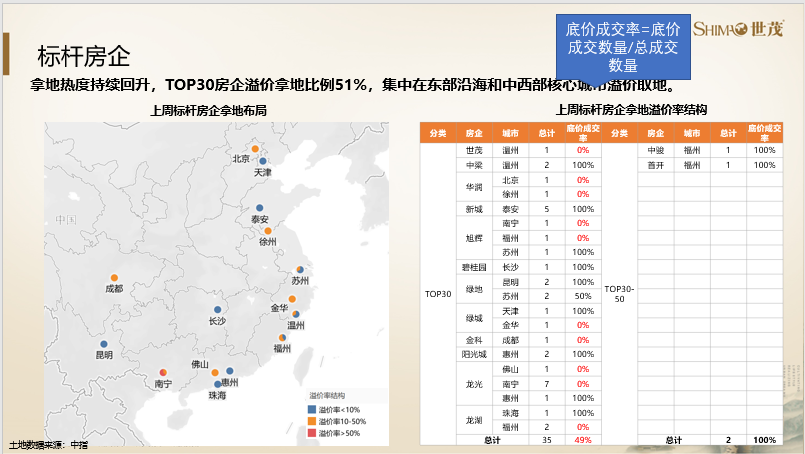

## 处理数据

In [19]:
nadi = pd.read_excel('./中指综合后的2016-2020数据.xlsx', sheet_name='房企拿地')
nadi['城市能级'] = nadi['城市'].map(lambda x: city_map.get(x))
# nadi['城市能级'] = nadi['城市能级'].map(lambda x: cityType.get(x))
# # 筛选本周数据
nadi = nadi.query('年==@currentYear and 周==@currentWeek')
# nadi = nadi.query('年==@currentYear and 周==9')

nadi.fillna(0, inplace=True)
nadi['溢价率结构'] = nadi['平均溢价率(%)'].map(lambda x: '底价' if x<=10 else '高溢价' if x>=50 else '溢价')


In [20]:
nadi_piovt = nadi.pivot_table(values='地块名称',columns='溢价率结构', index=['房企排名', '房企', '城市'] ,aggfunc='count').reset_index().fillna(0)

for i in ['底价', '溢价', '高溢价']:
    if i not in nadi_piovt.columns:
        nadi_piovt[i] = 0

nadi_piovt['总计'] = nadi_piovt['底价'] + nadi_piovt['溢价'] + nadi_piovt['高溢价']
nadi_piovt = nadi_piovt.rename(columns={'房企排名': "分类"})


# TOP 30
nadi_piovt_1 = nadi_piovt[nadi_piovt['分类']=='TOP30']
# 添加总和
row = {'分类': 'TOP30', '房企': '总计', '城市':'', '底价':nadi_piovt_1['底价'].sum() , '总计':nadi_piovt_1['总计'].sum()}
nadi_piovt_1 = nadi_piovt_1.append(row, ignore_index=True)
nadi_piovt_1['底价成交率'] = nadi_piovt_1['底价'] / nadi_piovt_1['总计']
nadi_piovt_1 = nadi_piovt_1[['分类','房企','城市','总计','底价成交率']]
nadi_piovt_1['总计'] = nadi_piovt_1['总计'].astype(int)
nadi_piovt_1['底价成交率'] = nadi_piovt_1['底价成交率'].map(lambda x: "{:.0%}".format(x))


# TOP 30-50
nadi_piovt_2 = nadi_piovt[nadi_piovt['分类']=='TOP30-50']
# 添加总和
row = {'分类': 'TOP30-50', '房企': '总计', '城市':'', '底价':nadi_piovt_2['底价'].sum() , '总计':nadi_piovt_2['总计'].sum()}
nadi_piovt_2 = nadi_piovt_2.append(row, ignore_index=True)
nadi_piovt_2['底价成交率'] = nadi_piovt_2['底价'] / nadi_piovt_2['总计']
nadi_piovt_2 = nadi_piovt_2[['分类','房企','城市','总计','底价成交率']]
nadi_piovt_2['总计'] = nadi_piovt_2['总计'].astype(int)
nadi_piovt_2['底价成交率'] = nadi_piovt_2['底价成交率'].map(lambda x: "{:.0%}".format(x))


In [21]:
# 将表头添加到表中
data = nadi_piovt_1.values.tolist()
data.insert(0, nadi_piovt_1.columns)
nadi_piovt_1 = pd.DataFrame(data)


data = nadi_piovt_2.values.tolist()
data.insert(0, nadi_piovt_2.columns)
nadi_piovt_2 = pd.DataFrame(data)



In [22]:
df = pd.read_excel('./中指综合后的2016-2020数据.xlsx', sheet_name='房企拿地')
df.fillna(0, inplace=True)
df['城市能级'] = df['城市'].map(lambda x: city_map.get(x))
df['城市能级'] = df['城市能级'].map(lambda x: '一二线' if x == '佛山' else x)

# 筛选本周数据
df = df.query('年==@currentYear and 周==@currentWeek')
# nadi = nadi.query('年==@currentYear and 周==9')


df['溢价率结构'] = df['平均溢价率(%)'].map(lambda x: '底价' if x<=10 else '高溢价' if x>=50 else '溢价')

df.to_excel('极海.xlsx', index=False)


## 修改ppt

In [23]:
from pptx.chart.data import CategoryChartData
from pptx.enum.chart import XL_CHART_TYPE
from pptx.util import Inches
from pptx import Presentation
from pptx.dml.color import RGBColor
from pptx.chart.data import ChartData
from pptx.util import Pt
from pptx.enum.text import PP_ALIGN


# path = './世茂土地周报_2020-3.pptx'
# prs = Presentation(path)

i = 2
slide = prs.slides[2]
for j,shape in enumerate(slide.shapes):

    print('slides[%s]'%i+'.shapes[%s]'%j,shape.shape_type)
    if shape.has_text_frame:
        print(shape.text_frame.text)
    if shape.has_chart:
        print(shape.chart.chart_title.text_frame.text)
    print()

slides[2].shapes[0] PLACEHOLDER (14)
标杆房企

slides[2].shapes[1] TEXT_BOX (17)
上周标杆房企拿地布局

slides[2].shapes[2] PICTURE (13)

slides[2].shapes[3] PICTURE (13)

slides[2].shapes[4] AUTO_SHAPE (1)
拿地热度持续回升，TOP30房企溢价拿地比例51%，集中在东部沿海和中西部核心城市溢价取地。

slides[2].shapes[5] TEXT_BOX (17)
土地数据来源：中指

slides[2].shapes[6] TEXT_BOX (17)
上周标杆房企拿地溢价率结构



In [24]:
# 房企映射表
fang = {
    '世茂房地产':'世茂', "中梁地产集团":'中梁', "华润置地":'华润', "新城发展控股":'新城',
    '旭辉集团': '旭辉', '绿地控股': '绿地', '绿城中国': '绿城', '金科股份': '金科',
    '阳光城集团': '阳光城', "龙光地产": '龙光', "龙湖集团":'龙湖', '中国恒大':'恒大',
    '融信中国':'融信', '融创中国': '融创','远洋集团':'远洋',
    
    '中骏集团':'中骏', '首开股份':'首开', "佳兆业集团":'佳兆业'
}

In [25]:
nadi_piovt_2

,0,1,2,3,4
0,分类,房企,城市,总计,底价成交率
1,TOP30-50,华发股份,成都,1,0%
2,TOP30-50,滨江集团,杭州,3,33%
3,TOP30-50,荣盛发展,杭州,1,0%
4,TOP30-50,总计,,5,20%


In [26]:
nadi_piovt_1

,0,1,2,3,4
0,分类,房企,城市,总计,底价成交率
1,TOP30,中南建设,南通,2,100%
2,TOP30,中国金茂,嘉兴,1,100%
3,TOP30,保利地产,金华,1,0%
4,TOP30,华润置地,宁波,1,0%
5,TOP30,招商蛇口,徐州,1,0%
6,TOP30,招商蛇口,惠州,1,100%
7,TOP30,绿地控股,南宁,2,0%
8,TOP30,绿城中国,成都,1,0%
9,TOP30,蓝光发展,烟台,1,100%


In [27]:
# 整合到一张表
# 选定PPT 
slide = prs.slides[2]
# 设置字体大小
fontSize = 8


left = Pt(500.41)
top = Pt(141.97)
width = Pt(435.58)
height = Pt(387.51)

row = nadi_piovt_1.shape[0] if nadi_piovt_1.shape[0] > nadi_piovt_2.shape[0] else nadi_piovt_2.shape[0]
col = 10
print(row, col)

tables = slide.shapes.add_table(
    rows=row, cols=col, left=left, top=top, width=width, height=height)

table = tables.table

# 控制字体大小,和字体位置
for j in range(5):
    for i in range( row):           
        cell = table.cell(i,j)
        cell.fill.background()
        try:
            texts = str(nadi_piovt_1.iloc[i,j])
        except:
            texts = ''
        cell.text_frame.paragraphs[0].text = fang.get(texts, texts)
        cell.text_frame.paragraphs[0].font.size = Pt(fontSize)
        cell.text_frame.paragraphs[0].font.name = '微软雅黑'
        # cell.fill.solid()
        # cell.fill.fore_color.rgb = RGBColor(255,255,255)
        if str(texts) in ['0%']:
            cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255,0,0)
            
        if str(texts) in ["分类", "房企", "城市",  "底价成交率", '总计']:
            cell.fill.solid()
            cell.fill.fore_color.rgb = RGBColor(240, 127, 0)
            cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255,255,255)
            
        par = cell.text_frame.paragraphs[0]
        par.alignment = PP_ALIGN.CENTER      # 左右居中
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中


# 控制字体大小,和字体位置
for j in range(5, col):
    for i in range( row):
        print(i,j)
        cell = table.cell(i,j)
        cell.fill.background()
        try:
            texts = str(nadi_piovt_2.iloc[i,j-5])
        except:
            texts = ''
          
        cell.text_frame.paragraphs[0].text = fang.get(texts, texts)
        cell.text_frame.paragraphs[0].font.size = Pt(fontSize)
        cell.text_frame.paragraphs[0].font.name = '微软雅黑'
        # cell.fill.solid()
        # cell.fill.fore_color.rgb = RGBColor(255,255,255)
        if str(texts) in ['0%']:
            cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255,0,0)
        if str(texts) in ["分类", "房企", "城市",  "底价成交率", '总计']:
            cell.fill.solid()
            cell.fill.fore_color.rgb = RGBColor(240, 127, 0)
            cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255,255,255)
            
        par = cell.text_frame.paragraphs[0]
        par.alignment = PP_ALIGN.CENTER      # 左右居中
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
        

    
for i in range(len(table.columns)):
    column = table.columns[i]
    column.width = Pt(43.5)

# 行高
for Row in table.rows:
    Row.height = Pt(11)


# 合并 前两列
for col in [0,1, 5,6]:
    baseCell, number = '', []
    for r in range(row):
        cell = table.cell(r, col)
        if r == 0:
            baseCell = cell
            number.append(r)
            continue
       
        # print(r, baseCell.text, cell.text, number)
        if baseCell.text == cell.text:
            number.append(r)
            if r == row-1:
                if len(number) > 1:
                    num = number.pop()
                    baseCell.merge(table.cell(num, col))
                    # print(baseCell.text, "1", table.cell(num, col).text)
                    baseCell.text = baseCell.text.split('\n')[0]
                    baseCell.text_frame.paragraphs[0].font.size = Pt(fontSize)
                    baseCell.text_frame.paragraphs[0].font.name = '微软雅黑'
                    par = baseCell.text_frame.paragraphs[0]    # 设置对其方式
                    par.alignment = PP_ALIGN.CENTER
                    baseCell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
                  
        else:
   
            if len(number) > 1:
                num = number.pop()
                baseCell.merge(table.cell(num, col))
                baseCell.text = baseCell.text.split('\n')[0]
                baseCell.text_frame.paragraphs[0].font.size = Pt(fontSize)
                baseCell.text_frame.paragraphs[0].font.name = '微软雅黑'
                par = baseCell.text_frame.paragraphs[0]    # 设置对其方式
                par.alignment = PP_ALIGN.CENTER
                baseCell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
                
                baseCell = table.cell(num+1, col)
                number = []

            else:
                baseCell = cell
                number = []
                number.append(r)


for i in range(1,row):    
    for j in range(col):
        cell = table.cell(i,j)
        cell.text_frame.paragraphs[0].font.size = Pt(fontSize)
        cell.text_frame.paragraphs[0].font.name = '微软雅黑'
        par = cell.text_frame.paragraphs[0]    # 设置对其方式
        par.alignment = PP_ALIGN.CENTER
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
    



13 10
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
8 5
9 5
10 5
11 5
12 5
0 6
1 6
2 6
3 6
4 6
5 6
6 6
7 6
8 6
9 6
10 6
11 6
12 6
0 7
1 7
2 7
3 7
4 7
5 7
6 7
7 7
8 7
9 7
10 7
11 7
12 7
0 8
1 8
2 8
3 8
4 8
5 8
6 8
7 8
8 8
9 8
10 8
11 8
12 8
0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9
10 9
11 9
12 9


### 插入左边表格..........(TOP30)

In [28]:
# # 选定PPT 
# slide = prs.slides[2]
# # 设置字体大小
# fontSize = 8


# left = Pt(500.41)
# top = Pt(141.97)
# width = Pt(435.58)
# height = Pt(387.51)

# row = nadi_piovt_1.shape[0] if nadi_piovt_1.shape[0] > nadi_piovt_2.shape[0] else nadi_piovt_2.shape[0]
# col = 5

# tables = slide.shapes.add_table(
#     rows=row, cols=col, left=left, top=top, width=width, height=height)

# table = tables.table

# # 控制字体大小,和字体位置
# for i in range(row):
#     for j in range( col):           
#         cell = table.cell(i,j)
#         cell.fill.background()
#         texts = str(nadi_piovt_1.iloc[i,j])       
#         cell.text_frame.paragraphs[0].text = fang.get(texts, texts)
#         cell.text_frame.paragraphs[0].font.size = Pt(fontSize)
#         cell.text_frame.paragraphs[0].font.name = '微软雅黑'
#         # cell.fill.solid()
#         # cell.fill.fore_color.rgb = RGBColor(255,255,255)
#         if str(texts) in ['0%']:
#             cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255,0,0)
            
#         if str(texts) in ["分类", "房企", "城市",  "底价成交率", '总计']:
#             cell.fill.solid()
#             cell.fill.fore_color.rgb = RGBColor(240, 127, 0)
#             cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255,255,255)
            
#         par = cell.text_frame.paragraphs[0]
#         par.alignment = PP_ALIGN.CENTER      # 左右居中
#         cell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
    
# for i in range(len(table.columns)):
#     column = table.columns[i]
#     column.width = Pt(43.2)

# # 行高
# for Row in table.rows:
#     Row.height = Pt(11)


# # 合并 前两列
# for col in range(2):
#     baseCell, number = '', []
#     for r in range(row):
#         cell = table.cell(r, col)
#         if r == 0:
#             baseCell = cell
#             number.append(r)
#             continue
       
#         # print(r, baseCell.text, cell.text, number)
#         if baseCell.text == cell.text:
#             number.append(r)
#             if r == row-1:
#                 if len(number) > 1:
#                     num = number.pop()
#                     baseCell.merge(table.cell(num, col))
#                     # print(baseCell.text, "1", table.cell(num, col).text)
#                     baseCell.text = baseCell.text.split('\n')[0]
#                     baseCell.text_frame.paragraphs[0].font.size = Pt(fontSize)
#                     baseCell.text_frame.paragraphs[0].font.name = '微软雅黑'
#                     par = baseCell.text_frame.paragraphs[0]    # 设置对其方式
#                     par.alignment = PP_ALIGN.CENTER
#                     baseCell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
                  
#         else:
   
#             if len(number) > 1:
#                 num = number.pop()
#                 baseCell.merge(table.cell(num, col))
#                 baseCell.text = baseCell.text.split('\n')[0]
#                 baseCell.text_frame.paragraphs[0].font.size = Pt(fontSize)
#                 baseCell.text_frame.paragraphs[0].font.name = '微软雅黑'
#                 par = baseCell.text_frame.paragraphs[0]    # 设置对其方式
#                 par.alignment = PP_ALIGN.CENTER
#                 baseCell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
                
#                 baseCell = table.cell(num+1, col)
#                 number = []

#             else:
#                 baseCell = cell
#                 number = []
#                 number.append(r)


# for i in range(1,row):    
#     for j in range(col):
#         cell = table.cell(i,j)
#         cell.text_frame.paragraphs[0].font.size = Pt(fontSize)
#         cell.text_frame.paragraphs[0].font.name = '微软雅黑'
#         par = cell.text_frame.paragraphs[0]    # 设置对其方式
#         par.alignment = PP_ALIGN.CENTER
#         cell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
    

### 插入右边 表格

In [29]:
# # 选定PPT 
# slide = prs.slides[2]
# # 设置字体大小
# fontSize = 8


# left = Pt(715.50)
# top = Pt(141.97)
# width = Pt(216)
# height = Pt(387.51)

# row = nadi_piovt_1.shape[0] if nadi_piovt_1.shape[0] > nadi_piovt_2.shape[0] else nadi_piovt_2.shape[0]
# col = 5

# tables = slide.shapes.add_table(
#     rows=row, cols=col, left=left, top=top, width=width, height=height)

# table = tables.table

# # 控制字体大小,和字体位置
# for i in range(row):
#     for j in range( col):           
#         cell = table.cell(i,j)
#         cell.fill.background()
#         try:
#             texts = str(nadi_piovt_2.iloc[i,j])
#         except:
#             texts = ''
          
#         cell.text_frame.paragraphs[0].text = fang.get(texts, texts)
#         cell.text_frame.paragraphs[0].font.size = Pt(fontSize)
#         cell.text_frame.paragraphs[0].font.name = '微软雅黑'
#         # cell.fill.solid()
#         # cell.fill.fore_color.rgb = RGBColor(255,255,255)
#         if str(texts) in ['0%']:
#             cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255,0,0)
#         if str(texts) in ["分类", "房企", "城市",  "底价成交率", '总计']:
#             cell.fill.solid()
#             cell.fill.fore_color.rgb = RGBColor(240, 127, 0)
#             cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255,255,255)
            
#         par = cell.text_frame.paragraphs[0]
#         par.alignment = PP_ALIGN.CENTER      # 左右居中
#         cell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
    
# for i in range(len(table.columns)):
#     column = table.columns[i]
#     column.width = Pt(43.2)

# # 行高
# for Row in table.rows:
#     Row.height = Pt(fontSize)


# for col in range(2):
#     baseCell, number = '', []
#     for r in range(row):
#         cell = table.cell(r, col)
#         if r == 0:
#             baseCell = cell
#             number.append(r)
#             continue
       
#         # print(r, baseCell.text, cell.text, number)
#         if baseCell.text == cell.text:
#             number.append(r)
#             if r == row-1:
#                 if len(number) > 1:
#                     num = number.pop()
#                     baseCell.merge(table.cell(num, col))
                    
#                     # print(baseCell.text, "1", table.cell(num, col).text)
#                     baseCell.text = baseCell.text.split('\n')[0]
#                     baseCell.text_frame.paragraphs[0].font.size = Pt(fontSize)
#                     baseCell.text_frame.paragraphs[0].font.name = '微软雅黑'
#                     par = baseCell.text_frame.paragraphs[0]    # 设置对其方式
#                     par.alignment = PP_ALIGN.CENTER
#                     baseCell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
                  
#         else:
        
#             if len(number) > 1:
#                 num = number.pop()
#                 baseCell.merge(table.cell(num, col))
#                 baseCell.text = baseCell.text.split('\n')[0]
#                 baseCell.text_frame.paragraphs[0].font.size = Pt(fontSize)
#                 baseCell.text_frame.paragraphs[0].font.name = '微软雅黑'
#                 par = baseCell.text_frame.paragraphs[0]    # 设置对其方式
#                 par.alignment = PP_ALIGN.CENTER
#                 baseCell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
                
#                 baseCell = table.cell(num+1, col)
#                 number = []

#             else:
#                 baseCell = cell
#                 number = []
#                 number.append(r)


# for i in range(1,row):    
#     for j in range(col):
#         cell = table.cell(i,j)
#         cell.text_frame.paragraphs[0].font.size = Pt(fontSize)
#         cell.text_frame.paragraphs[0].font.name = '微软雅黑'
#         par = cell.text_frame.paragraphs[0]    # 设置对其方式
#         par.alignment = PP_ALIGN.CENTER
#         cell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
    

# 第四页PPT
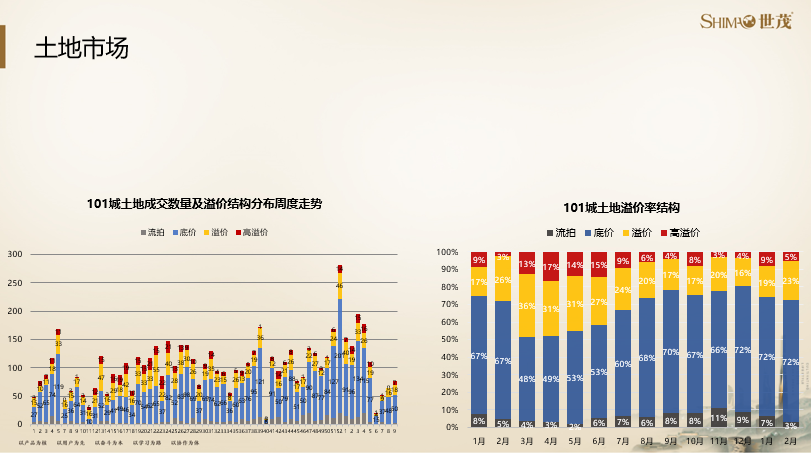

## 处理数据

In [30]:
# 城市能级 city_map
# 城市能级 city_map

city_map = {
   "北京": "一二线","上海": "一二线","广州": "一二线","深圳": "一二线","南京": "一二线","苏州": "一二线","厦门": "一二线","合肥": "一二线",
"天津": "一二线","武汉": "一二线","杭州": "一二线","福州": "一二线","济南": "一二线","南昌": "一二线","无锡": "一二线","宁波": "一二线",
"成都": "一二线","郑州": "一二线","南宁": "一二线","长沙": "一二线","西安": "一二线","重庆": "一二线","青岛": "一二线","沈阳": "一二线",
"大连": "一二线","常州": "一二线","徐州": "一二线","南通": "一二线","嘉兴": "三四线","绍兴": "三四线","温州": "一二线","镇江": "三四线",
"泉州": "一二线","漳州": "三四线","佛山": "一二线","东莞": "一二线","中山": "三四线","惠州": "三四线","珠海": "一二线","安庆": "三四线",
"株洲": "三四线","阜阳": "三四线","芜湖": "三四线","荆门": "三四线","荆州": "三四线","抚州": "三四线","赣州": "三四线","吉安": "三四线",
"九江": "三四线","信阳": "三四线","南阳": "三四线","淄博": "三四线","临沂": "三四线","兰州": "一二线","昆明": "一二线","宝鸡": "三四线",
"德阳": "三四线","哈尔滨": "一二线","湖州": "三四线","江门": "三四线","金华": "三四线","丽水": "三四线","龙岩": "三四线","泸州": "三四线",
"马鞍山": "三四线","南平": "三四线","内江": "三四线","宁德": "三四线","莆田": "三四线","衢州": "三四线","三明": "三四线","汕头": "三四线",
"石家庄": "一二线","台州": "三四线","泰州": "三四线","潍坊": "三四线","烟台": "一二线","盐城": "三四线","银川": "一二线","长春": "一二线",
"肇庆": "三四线","茂名": "三四线","海口": "一二线","泰安": "三四线","威海": "三四线","包头": "三四线","舟山": "三四线","柳州": "三四线",
"贵港": "三四线","天水": "三四线","淮南": "三四线","玉林": "三四线","牡丹江": "三四线","宣城": "三四线","张家界": "三四线","德州": "三四线",
"日照": "三四线","淮北": "三四线","广元": "三四线","汉中": "三四线","绵阳": "三四线"
}

# 城市类型
cityType = {
"北京": "深耕型","上海": "深耕型","广州": "深耕型","深圳": "深耕型","南京": "深耕型","苏州": "深耕型","厦门": "深耕型","合肥": "深耕型",
"天津": "深耕型","武汉": "深耕型","杭州": "深耕型","福州": "深耕型","济南": "深耕型","南昌": "深耕型","无锡": "据点型","宁波": "深耕型",
"成都": "深耕型","郑州": "深耕型","南宁": "深耕型","长沙": "深耕型","西安": "深耕型","重庆": "深耕型","青岛": "深耕型","沈阳": "深耕型",
"大连": "深耕型","常州": "据点型","徐州": "深耕型","南通": "据点型","嘉兴": "据点型","绍兴": "据点型","温州": "深耕型","镇江": "据点型",
"泉州": "据点型","漳州": "据点型","佛山": "据点型","东莞": "据点型","中山": "据点型","惠州": "据点型","珠海": "深耕型","安庆": "机会型",
"株洲": "机会型","阜阳": "据点型","芜湖": "据点型","荆门": "机会型","荆州": "机会型","抚州": "机会型","赣州": "据点型","吉安": "机会型",
"九江": "机会型","信阳": "机会型","南阳": "机会型","淄博": "据点型","临沂": "据点型","兰州": "深耕型","昆明": "深耕型","宝鸡": "机会型",
"德阳": "机会型","哈尔滨": "深耕型","湖州": "据点型","江门": "据点型","金华": "据点型","丽水": "据点型","龙岩": "机会型","泸州": "机会型",
"马鞍山": "机会型","南平": "机会型","内江": "机会型","宁德": "机会型","莆田": "据点型","衢州": "据点型","三明": "机会型","汕头": "据点型",
"石家庄": "深耕型","台州": "据点型","泰州": "据点型","潍坊": "据点型","烟台": "据点型","盐城": "据点型","银川": "深耕型","长春": "深耕型",
"肇庆": "机会型","茂名": "据点型","海口": "深耕型","泰安": "据点型","威海": "据点型","包头": "据点型","舟山": "据点型","柳州": "据点型",
"贵港": "机会型","天水": "机会型","淮南": "机会型","玉林": "机会型","牡丹江": "机会型","宣城": "机会型","张家界": "机会型","德州": "机会型",
"日照": "据点型","淮北": "机会型","广元": "机会型","汉中": "机会型","绵阳": "机会型"

}

In [31]:
# 底稿城市
city_digao = ["北京","上海","广州","深圳","南京","苏州","厦门","合肥","天津","武汉","杭州","福州","济南",
              "南昌","无锡","宁波","成都","郑州","南宁","长沙","西安","重庆","青岛","沈阳","大连","常州",
              "徐州","南通","嘉兴","绍兴","温州","镇江","扬州","泉州","漳州","佛山","东莞","中山","惠州",
              "珠海","安庆","株洲","阜阳","蚌埠","常德","湘潭","芜湖","岳阳","荆门","荆州","襄阳","宜昌",
              "抚州","赣州","吉安","九江","洛阳","信阳","新乡","南阳","淄博","临沂","兰州","昆明","宝鸡",
              "德阳","贵阳","哈尔滨","衡阳","呼和浩特","湖州","淮安","济宁","江门","金华","廊坊","丽水",
              "连云港","龙岩","泸州","马鞍山","南平","内江","宁德","莆田","衢州","三明","汕头","石家庄",
              "台州","太原","泰州","潍坊","乌鲁木齐","烟台","盐城","银川","湛江","长春","肇庆","茂名"]
city_digao = pd.DataFrame(city_digao, columns=['城市'])

### 处理101城土地成交及溢价结构 周度走势

In [32]:
# 读取数据
deal = pd.read_excel('./中指综合后的2016-2020数据.xlsx', sheet_name='土地成交明细')
liupai = pd.read_excel('./中指综合后的2016-2020数据.xlsx', sheet_name='土地流拍')

deal.replace('--', 0, inplace=True)
deal.fillna(0, inplace=True)
liupai.replace('--', 0, inplace=True)
liupai.fillna(0, inplace=True)

deal.loc[deal[deal['起始价(万元)']==0].index, '起始价(万元)'] = deal[deal['起始价(万元)']==0]['成交价(万元)']
deal.loc[deal[deal['成交价(万元)']==0].index, '成交价(万元)'] = deal[deal['成交价(万元)']==0]['起始价(万元)']


# 处理流拍数据
liupai['成交价(万元)'] = 0
liupai['成交楼面价(元/㎡)'] = 0
liupai['溢价率'] = '流拍'
liupai['受让单位'] = ''
liupai['土地星级'] = '0星'
liupai['溢价率分类'] = '流拍'


# 处理成交数据
deal['溢价率分类'] = deal['溢价率'].map(lambda x: '底价' if x<=10 else '高溢价' if x>=50 else '溢价' )

deal_liupai = pd.concat((deal, liupai), ignore_index=True, sort=False)
deal_liupai['日'] = deal_liupai['截止日期'].map(lambda x: str(x.split("-")[2]).lstrip('0'))
deal_liupai['城市能级'] = deal_liupai['城市'].map(lambda x: city_map[x])
deal_liupai['城市分类'] = deal_liupai['城市'].map(lambda x: cityType[x])
deal_liupai = deal_liupai[deal_liupai['年']>2018]

In [33]:
deal_liupai_1 = deal_liupai.copy()
deal_liupai_1.loc[deal_liupai_1.query('月=="12" and 周=="1" ').index,"年"] = currentYear
deal_liupai_1 = deal_liupai_1.pivot_table(values='地块名称', index=['年', '周'], columns='溢价率分类', aggfunc='count', fill_value=0)


deal_liupai_1 = deal_liupai_1.reset_index()
deal_liupai_1 = deal_liupai_1[['年', '周', '流拍', '底价','溢价','高溢价']]
deal_liupai_1.head()

溢价率分类,年,周,流拍,底价,溢价,高溢价
0,2019,1,4,32,16,4
1,2019,2,6,45,9,6
2,2019,3,5,66,9,7
3,2019,4,13,77,17,11
4,2019,5,8,97,29,10


### 处理101 城 溢价结构数据

In [34]:
deal_liupai_2 = deal_liupai.copy()
deal_liupai_2 = deal_liupai_2.pivot_table(values='地块名称', index=['年', '月'], columns='溢价率分类', aggfunc='count', fill_value=0)


# deal_liupai_1 = deal_liupai_1.reset_index()
# deal_liupai_1 = deal_liupai_1[['年', '周', '流拍', '底价','溢价','高溢价']]
# deal_liupai_1.head()
deal_liupai_2

溢价率分类     底价  流拍   溢价  高溢价
年    月                    
2019 1   289  35   69   36
     2   141  17   44    9
     3   148  14   92   33
     4   206  19  113   67
     5   247  15  151   62
     6   251  28  122   66
     7   314  35  113   49
     8   241  25   65   21
     9   327  49   69   20
     10  247  52   70   33
     11  301  37   81   12
     12  478  61  115   28
2020 1   183  16   52   18
     2   161  19   42   11
     3   161  15   68   22
     4   282  20  131   43
     5   205  18  137   36
     6   373  35  184   57
     7   317  22  137   52
     8   248  11  104   35
     9   288  16  110   48
     10  363  36   95   25
     11  234  12   95   53
     12  585  60  149   36
2021 1    42   3   21    6

In [35]:
# if '高溢价' not in digao.columns:
#     digao['高溢价'] = 0

b = deal_liupai_2.copy()
b.eval(' 总计 = 底价+溢价+高溢价', inplace=True)
b.eval(' 总计流拍 = 底价+溢价+流拍+高溢价', inplace=True)

b['底价'] = (b['底价'] / b['总计流拍']).apply(lambda x: format(x, '.4f')) 
b['流拍'] = (b['流拍'] / b['总计流拍']).apply(lambda x: format(x, '.4f')) 
b['溢价'] = (b['溢价'] / b['总计流拍']).apply(lambda x: format(x, '.4f')) 
b['高溢价'] = (b['高溢价'] / b['总计流拍']).apply(lambda x: format(x, '.4f')) 

b

溢价率分类        底价      流拍      溢价     高溢价   总计  总计流拍
年    月                                            
2019 1   0.6737  0.0816  0.1608  0.0839  394   429
     2   0.6682  0.0806  0.2085  0.0427  194   211
     3   0.5157  0.0488  0.3206  0.1150  273   287
     4   0.5086  0.0469  0.2790  0.1654  386   405
     5   0.5200  0.0316  0.3179  0.1305  460   475
     6   0.5375  0.0600  0.2612  0.1413  439   467
     7   0.6145  0.0685  0.2211  0.0959  476   511
     8   0.6847  0.0710  0.1847  0.0597  327   352
     9   0.7032  0.1054  0.1484  0.0430  416   465
     10  0.6144  0.1294  0.1741  0.0821  350   402
     11  0.6984  0.0858  0.1879  0.0278  394   431
     12  0.7009  0.0894  0.1686  0.0411  621   682
2020 1   0.6803  0.0595  0.1933  0.0669  253   269
     2   0.6910  0.0815  0.1803  0.0472  214   233
     3   0.6053  0.0564  0.2556  0.0827  251   266
     4   0.5924  0.0420  0.2752  0.0903  456   476
     5   0.5177  0.0455  0.3460  0.0909  378   396
     6   0.5747  0.0539  0.2835  0.0878  614   649
     7   0.6004  0.0417  0.2595  0.0985  506   528
     8   0.6231  0.0276  0.2613  0.0879  387   398
     9   0.6234  0.0346  0.2381  0.1039  446   462
     10  0.6994  0.0694  0.1830  0.0482  483   519
     11  0.5939  0.0305  0.2411  0.1345  382   394
     12  0.7048  0.0723  0.1795  0.0434  770   830
2021 1   0.5833  0.0417  0.2917  0.0833   69    72

## 修改PPT

In [36]:
from pptx.chart.data import CategoryChartData
from pptx.enum.chart import XL_CHART_TYPE
from pptx.util import Inches
from pptx import Presentation
from pptx.dml.color import RGBColor
from pptx.chart.data import ChartData
from pptx.util import Pt
from pptx.enum.text import PP_ALIGN


# path = './世茂土地周报_2020-3.pptx'
# prs = Presentation(path)

i = 3
slide = prs.slides[3]
for j,shape in enumerate(slide.shapes):

    print('slides[%s]'%i+'.shapes[%s]'%j,shape.shape_type)
    if shape.has_text_frame:
        print(shape.text_frame.text)
    if shape.has_chart:
        print(shape.chart.chart_title.text_frame.text)
    print()

slides[3].shapes[0] PLACEHOLDER (14)
土地市场

slides[3].shapes[1] CHART (3)
101城土地溢价率结构

slides[3].shapes[2] CHART (3)
101城土地成交数量及溢价结构分布周度走势



### 修改周度走势

In [37]:
deal_liupai_1.head()

溢价率分类,年,周,流拍,底价,溢价,高溢价
0,2019,1,4,32,16,4
1,2019,2,6,45,9,6
2,2019,3,5,66,9,7
3,2019,4,13,77,17,11
4,2019,5,8,97,29,10


In [38]:
shapes = slide.shapes[2]

chart_data = ChartData()
chart_data.categories = list(deal_liupai_1['周'])
chart_data.add_series('流拍', tuple(deal_liupai_1['流拍']) )
chart_data.add_series('底价', tuple(deal_liupai_1['底价']) )
chart_data.add_series('溢价', tuple(deal_liupai_1['溢价']) )
chart_data.add_series('高溢价', tuple(deal_liupai_1['高溢价']) )


# 替换数据
shapes.chart.replace_data(chart_data)

### 修改溢价结构

In [39]:
b = b.reset_index()
b.head()

溢价率分类,年,月,底价,流拍,溢价,高溢价,总计,总计流拍
0,2019,1,0.6737,0.0816,0.1608,0.0839,394,429
1,2019,2,0.6682,0.0806,0.2085,0.0427,194,211
2,2019,3,0.5157,0.0488,0.3206,0.1150,273,287
3,2019,4,0.5086,0.0469,0.2790,0.1654,386,405
4,2019,5,0.5200,0.0316,0.3179,0.1305,460,475


In [40]:
# 修改 月度走势表
shapes = slide.shapes[1]

chart_data = ChartData()
chart_data.categories = list(b['月'])
chart_data.add_series('流拍', tuple(b['流拍']) )
chart_data.add_series('底价', tuple(b['底价']) )
chart_data.add_series('溢价', tuple(b['溢价']) )
chart_data.add_series('高溢价', tuple(b['高溢价']) )


# 替换数据
shapes.chart.replace_data(chart_data)

# 第五页PPT
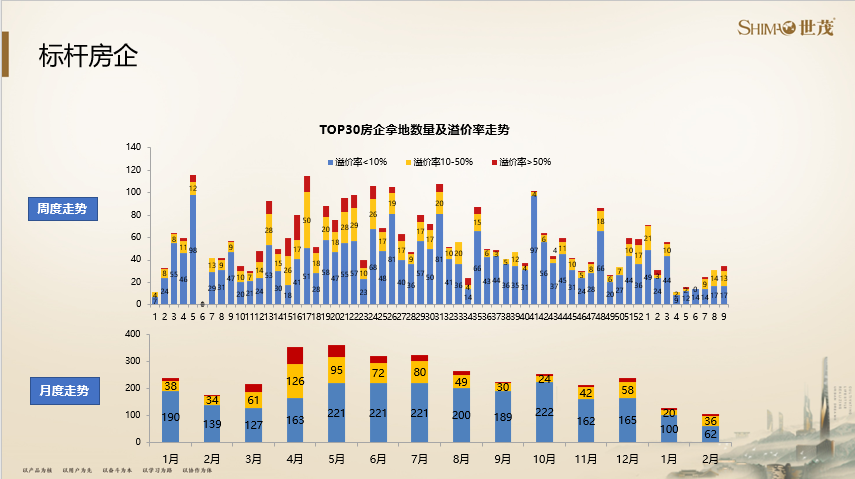

## 整理数据

In [41]:
nadi = pd.read_excel('./中指综合后的2016-2020数据.xlsx', sheet_name='房企拿地')

nadi.fillna(0, inplace=True)
nadi = nadi[['房企', '地块名称', '城市', '规划用途', '占地面积(万㎡)',
           '规划建筑面积(万㎡)', '总成交金额(亿元)', '平均楼面价(元/㎡)',
           '平均溢价率(%)', '土地权益(%)','权益金额(亿元)', '权益规划建筑面积(万㎡)', 
            '拿地时间', '城市能级', '年', '月', '周', '房企排名']]
nadi['城市能级'] = nadi['城市'].map(lambda x: city_map.get(x, '三四线'))


nadi['日'] = nadi['拿地时间'].map(lambda x: x.split("-")[2].lstrip('0'))
nadi['溢价率结构'] = nadi['平均溢价率(%)'].map(lambda x: '溢价率<10%' if x<=10 else '溢价率>50%' if x>=50 else '溢价率10-50%'  )


In [42]:
nadi = nadi.query('年>2018')

### TOP30 周更

In [43]:
nadi_1 = nadi.copy()
nadi_1.loc[nadi_1.query('月=="12" and 周=="1" ').index,"年"] = 2020

top30 = nadi_1[nadi_1['房企排名'] == 'TOP30']
top30 = top30.fillna(0)

top30_piove_week = top30.pivot_table(values='地块名称', columns='溢价率结构', index=['年', '周'],  aggfunc='count', fill_value=0)

top30_piove_week.head()

溢价率结构   溢价率10-50%  溢价率<10%  溢价率>50%
年    周                             
2019 1          5        6        0
     2          7       24        1
     3          8       53        1
     4         11       47        3
     5         12       99        7

### TOP30 月更

In [44]:
top30_yue = nadi[nadi['房企排名'] == 'TOP30']
top30_yue = top30_yue.fillna(0)

top30_piove_yue = top30_yue.pivot_table(values='地块名称', columns='溢价率结构', index=['年', '月'],  aggfunc='count', fill_value=0)

top30_piove_yue.head()

溢价率结构   溢价率10-50%  溢价率<10%  溢价率>50%
年    月                             
2019 1         38      189       10
     2         34      141        5
     3         65      139       30
     4        133      173       64
     5         99      226       44

## 修改ppt

In [45]:
from pptx.chart.data import CategoryChartData
from pptx.enum.chart import XL_CHART_TYPE
from pptx.util import Inches
from pptx import Presentation
from pptx.dml.color import RGBColor
from pptx.chart.data import ChartData
from pptx.util import Pt
from pptx.enum.text import PP_ALIGN


# path = './世茂土地周报_2020-3.pptx'
# prs = Presentation(path)

i = 4
slide = prs.slides[4]
for j,shape in enumerate(slide.shapes):

    print('slides[%s]'%i+'.shapes[%s]'%j,shape.shape_type)
    if shape.has_text_frame:
        print(shape.text_frame.text)
    if shape.has_chart:
        print(shape.chart.chart_title.text_frame.text)
    print()

slides[4].shapes[0] PLACEHOLDER (14)
标杆房企

slides[4].shapes[1] CHART (3)


slides[4].shapes[2] CHART (3)


slides[4].shapes[3] TEXT_BOX (17)
TOP30房企拿地数量及溢价率走势

slides[4].shapes[4] AUTO_SHAPE (1)
周度走势

slides[4].shapes[5] AUTO_SHAPE (1)
月度走势



### 修改TOP30 周更

In [46]:
top30_piove_week = top30_piove_week.reset_index()
top30_piove_week.head(2)

shapes = slide.shapes[2]

chart_data = ChartData()
chart_data.categories = list(top30_piove_week['周'])
chart_data.add_series('溢价率<10%', tuple(top30_piove_week['溢价率<10%']) )
chart_data.add_series('溢价率10-50%', tuple(top30_piove_week['溢价率10-50%']) )
chart_data.add_series('溢价率>50%', tuple(top30_piove_week['溢价率>50%']) )


# 替换数据
shapes.chart.replace_data(chart_data)

### 修改TOP30 月更

In [47]:
top30_piove_yue = top30_piove_yue.reset_index()
top30_piove_yue.head(2)

溢价率结构,年,月,溢价率10-50%,溢价率<10%,溢价率>50%
0,2019,1,38,189,10
1,2019,2,34,141,5


In [48]:
shapes = slide.shapes[1]

chart_data = ChartData()
chart_data.categories = list(top30_piove_yue['月'])
chart_data.add_series('溢价率<10%', tuple(top30_piove_yue['溢价率<10%']) )
chart_data.add_series('溢价率10-50%', tuple(top30_piove_yue['溢价率10-50%']) )
chart_data.add_series('溢价率>50%', tuple(top30_piove_yue['溢价率>50%']) )


# 替换数据
shapes.chart.replace_data(chart_data)

# 第六页PPT

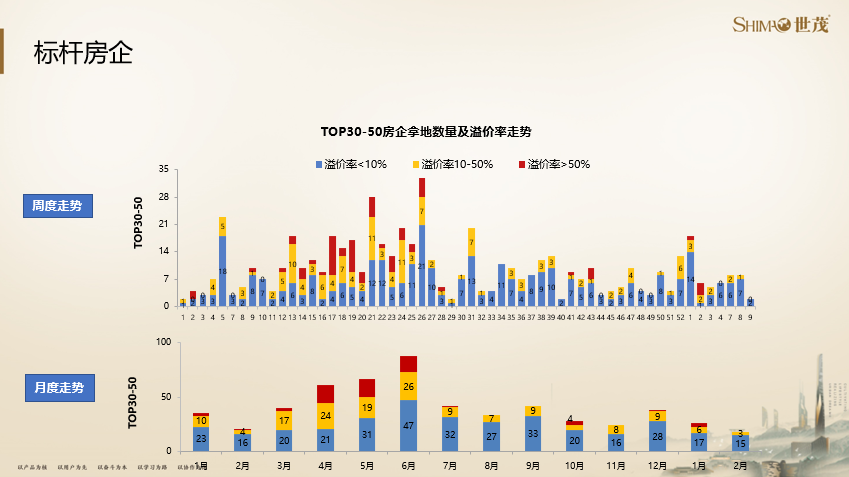

## 整理数据

### TOP30-50 周更

In [49]:
nadi_1 = nadi.copy()
nadi_1.loc[nadi_1.query('月=="12" and 周=="1" ').index,"年"] = 2020

top30_50 = nadi_1[nadi_1['房企排名'] == 'TOP30-50']
top30_50 = top30_50.fillna(0)

top30_50_piove_week = top30_50.pivot_table(values='地块名称', columns='溢价率结构', index=['年', '周'],  aggfunc='count', fill_value=0)

top30_50_piove_week.head()

溢价率结构   溢价率10-50%  溢价率<10%  溢价率>50%
年    周                             
2019 1          2        4        0
     2          1        2        1
     3          1        3        1
     4          4        5        1
     5          6       18        0

### TOP30-50 月更

In [50]:
top30_50_yue = nadi[nadi['房企排名'] == 'TOP30-50']
top30_50_yue = top30_50_yue.fillna(0)

top30_50_piove_yue = top30_50_yue.pivot_table(values='地块名称', columns='溢价率结构', index=['年', '月'],  aggfunc='count', fill_value=0)

top30_50_piove_yue.head()

溢价率结构   溢价率10-50%  溢价率<10%  溢价率>50%
年    月                             
2019 1         13       28        3
     2          7       17        1
     3         18       22        4
     4         24       21       19
     5         23       35       18

## 修改ppt

In [51]:
from pptx.chart.data import CategoryChartData
from pptx.enum.chart import XL_CHART_TYPE
from pptx.util import Inches
from pptx import Presentation
from pptx.dml.color import RGBColor
from pptx.chart.data import ChartData
from pptx.util import Pt
from pptx.enum.text import PP_ALIGN


# path = './世茂土地周报_2020-3.pptx'
# prs = Presentation(path)

i = 5
slide = prs.slides[5]
for j,shape in enumerate(slide.shapes):

    print('slides[%s]'%i+'.shapes[%s]'%j,shape.shape_type)
    if shape.has_text_frame:
        print(shape.text_frame.text)
    if shape.has_chart:
        print(shape.chart.chart_title.text_frame.text)
    print()

slides[5].shapes[0] PLACEHOLDER (14)
标杆房企

slides[5].shapes[1] TEXT_BOX (17)
TOP30-50房企拿地数量及溢价率走势

slides[5].shapes[2] CHART (3)


slides[5].shapes[3] CHART (3)


slides[5].shapes[4] AUTO_SHAPE (1)
周度走势

slides[5].shapes[5] AUTO_SHAPE (1)
月度走势



### 修改TOP30-50周更

In [52]:
top30_50_piove_week = top30_50_piove_week.reset_index()
top30_50_piove_week.head(2)

shapes = slide.shapes[3]

chart_data = ChartData()
chart_data.categories = list(top30_50_piove_week['周'])
chart_data.add_series('溢价率<10%', tuple(top30_50_piove_week['溢价率<10%']) )
chart_data.add_series('溢价率10-50%', tuple(top30_50_piove_week['溢价率10-50%']) )
chart_data.add_series('溢价率>50%', tuple(top30_50_piove_week['溢价率>50%']) )


# 替换数据
shapes.chart.replace_data(chart_data)

### 修改TOP30-50 月更

In [53]:
top30_50_piove_yue = top30_50_piove_yue.reset_index()
top30_50_piove_yue.head(2)

溢价率结构,年,月,溢价率10-50%,溢价率<10%,溢价率>50%
0,2019,1,13,28,3
1,2019,2,7,17,1


In [54]:
shapes = slide.shapes[2]

chart_data = ChartData()
chart_data.categories = list(top30_50_piove_yue['月'])
chart_data.add_series('溢价率<10%', tuple(top30_50_piove_yue['溢价率<10%']) )
chart_data.add_series('溢价率10-50%', tuple(top30_50_piove_yue['溢价率10-50%']) )
chart_data.add_series('溢价率>50%', tuple(top30_50_piove_yue['溢价率>50%']) )


# 替换数据
shapes.chart.replace_data(chart_data)

# 第七页PPT
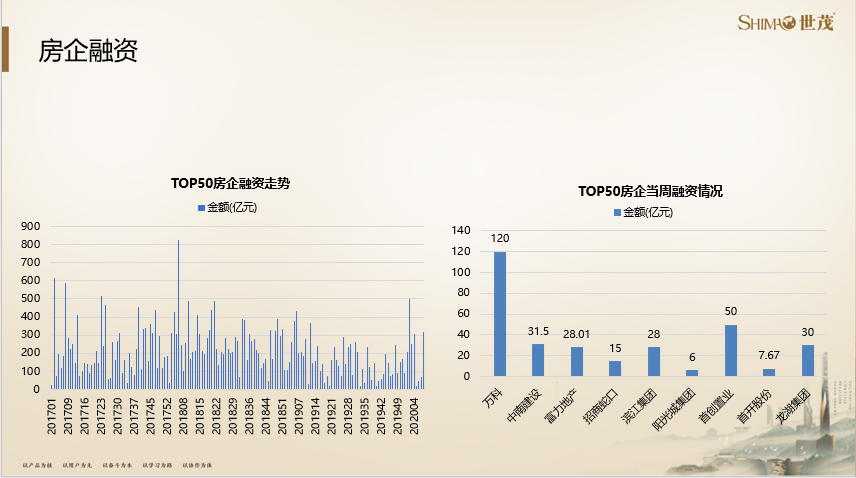

## 整理数据

In [55]:
# TOP50房企融资走势
rongzi = pd.read_excel('./中指综合后的2016-2020数据.xlsx', sheet_name='房企融资')
rongzi['年'] = rongzi['时间'].map(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').isocalendar()[0])
rongzi['周'] = rongzi['时间'].map(lambda x: int(datetime.datetime.strptime(x,'%Y-%m-%d').isocalendar()[1]))
rongzi['月'] = rongzi['时间'].map(lambda x: int(datetime.datetime.strptime(x,'%Y-%m-%d').month))
# rongzi['日'] = rongzi['时间'].map(lambda x: x.split('-')[2].lstrip('0'))

rongzi = rongzi[rongzi['年']>2016]

### TOP50融资走势

In [56]:
# 数据透视表
rong_toushi = rongzi.pivot_table(values='金额(亿元)',
                                 index=['年','周'],
#                                  columns=['周',
                                 aggfunc='sum',
                                 fill_value=0)

index = [str(i[0])+'0'+str(i[1]) if len(str(i[1]))==1  else str(i[0])+str(i[1]) for i in rong_toushi.index]


rong = pd.DataFrame(rong_toushi.values, index, columns=['金额(亿元)'])
rong = rong.reindex(index)
rong.head()


,金额(亿元)
201701,44.22
201702,613.21
201703,98.91
201704,194.30
201706,117.04


### 当周融资情况


In [57]:
lastrong = rongzi.query('年==@currentYear and 周==@currentWeek')

lastrong_toushi = lastrong.pivot_table(values='金额(亿元)', index='房企', aggfunc='sum')

if '金额(亿元)' not in lastrong_toushi.columns:
    lastrong_toushi['金额(亿元)'] = 0
    lastrong_toushi.loc['本周没有融资'] = 0

lastrong_toushi

,金额(亿元)
房企,
世茂房地产,112.62
中梁地产集团,12.91
新城发展控股,25.83
旭辉集团,27.05
正荣地产,25.83
滨江集团,3.38
碧桂园,77.46
禹洲地产,36.28
绿地控股,7.50


## 修改ppt

In [58]:
from pptx.chart.data import CategoryChartData
from pptx.enum.chart import XL_CHART_TYPE
from pptx.util import Inches
from pptx import Presentation
from pptx.dml.color import RGBColor
from pptx.chart.data import ChartData
from pptx.util import Pt
from pptx.enum.text import PP_ALIGN


# path = './世茂土地周报_2020-3.pptx'
# prs = Presentation(path)

i = 6
slide = prs.slides[6]
for j,shape in enumerate(slide.shapes):

    print('slides[%s]'%i+'.shapes[%s]'%j,shape.shape_type)
    if shape.has_text_frame:
        print(shape.text_frame.text)
    if shape.has_chart:
        print(shape.chart.chart_title.text_frame.text)
    print()

slides[6].shapes[0] PLACEHOLDER (14)
房企融资

slides[6].shapes[1] CHART (3)
TOP50房企当周融资情况

slides[6].shapes[2] CHART (3)
TOP50房企融资走势



### 修改TOP50 融资走势

In [59]:
# df: lastrong_toushi
# TOP50房企当周融资情况
shapes = slide.shapes[2]

chart_data = ChartData()
chart_data.categories = list(rong.index)
chart_data.add_series('金额(亿元)', tuple(rong['金额(亿元)']) )
# chart_data.add_series('溢价率10-50%', tuple(top35_piove_month['溢价率10-50%']) )
# chart_data.add_series('溢价率>50%', tuple(top35_piove_month['溢价率>50%']) )



# 替换数据
shapes.chart.replace_data(chart_data)

### 修改当周融资情况

In [60]:
# df: lastrong_toushi
# TOP50房企当周融资情况
shapes = slide.shapes[1]

chart_data = ChartData()
chart_data.categories = list(lastrong_toushi.index)
chart_data.add_series('金额(亿元)', tuple(lastrong_toushi['金额(亿元)']) )


# 替换数据
shapes.chart.replace_data(chart_data)

# 第 八 页PPT
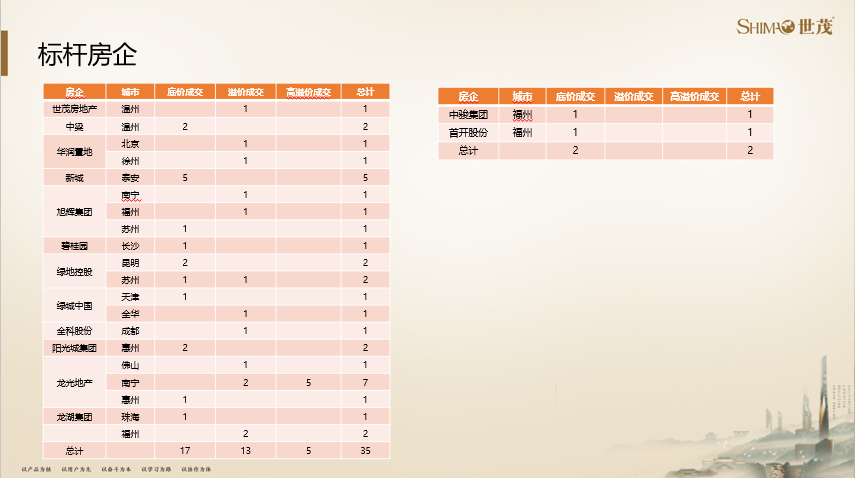

## 修改数据


In [61]:
nadi = pd.read_excel('./中指综合后的2016-2020数据.xlsx', sheet_name='房企拿地')

# 筛选本周数据
nadi = nadi.query('年==@currentYear and 周==@currentWeek')
# nadi = nadi.query('年==@currentYear and 周==9')

nadi.fillna(0, inplace=True)
nadi['溢价率结构'] = nadi['平均溢价率(%)'].map(lambda x: '底价' if x<=10 else '高溢价' if x>=50 else '溢价')


In [62]:
nadi['平均溢价率(%)']

16032      0.000000
16033     29.472443
16043     76.057141
16055     25.718233
16056     25.713921
16067     11.477880
16070      0.218914
16071    132.095097
16073     14.925373
16090      0.000000
16091      0.000000
16112      7.639495
16119      0.000000
16123      3.925923
16127     29.905723
16128      0.000000
16129    122.270742
16130     29.909214
16153     14.285703
Name: 平均溢价率(%), dtype: float64

In [63]:
nadi_piovt = nadi.pivot_table(values='地块名称',columns='溢价率结构', index=['房企排名', '房企', '城市'] ,aggfunc='count').reset_index().fillna(0)

for i in ['底价', '溢价', '高溢价']:
    if i not in nadi_piovt.columns:
        nadi_piovt[i] = 0
        
nadi_piovt['总计'] = nadi_piovt['底价'] + nadi_piovt['溢价'] + nadi_piovt['高溢价']
for i in ['底价', '溢价', '高溢价', '总计']:
    nadi_piovt[i] = nadi_piovt[i].astype(int)
# nadi_piovt.replace(0, np.NAN)

**TOP30 标杆房企 **

In [64]:
nadi_TOP30 = nadi_piovt[nadi_piovt['房企排名']=='TOP30']
# 在机会型和据点型添加总和
row = {
    '房企排名': 'TOP30', '房企':'总计', '城市':'', 
    '总计': nadi_TOP30['总计'].sum(),
    '底价': nadi_TOP30['底价'].sum(), '溢价': nadi_TOP30['溢价'].sum(),'高溢价': nadi_TOP30['高溢价'].sum()
}
nadi_TOP30 = nadi_TOP30.append(row, ignore_index=True)
nadi_TOP30 = nadi_TOP30.rename(columns={'底价':'底价成交', "溢价":'溢价成交', "高溢价":'高溢价成交'})
nadi_TOP30 = nadi_TOP30[['房企', '城市', '底价成交', '溢价成交', '高溢价成交', '总计']]

# 将表头添加到表中
data = nadi_TOP30.values.tolist()
data.insert(0, nadi_TOP30.columns)
nadi_TOP30 = pd.DataFrame(data)
nadi_TOP30 = nadi_TOP30.replace(0, '')
nadi_TOP30

,0,1,2,3,4,5
0,房企,城市,底价成交,溢价成交,高溢价成交,总计
1,中南建设,南通,2,,,2
2,中国金茂,嘉兴,1,,,1
3,保利地产,金华,,,1,1
4,华润置地,宁波,,1,,1
5,招商蛇口,徐州,,,1,1
6,招商蛇口,惠州,1,,,1
7,绿地控股,南宁,,2,,2
8,绿城中国,成都,,1,,1
9,蓝光发展,烟台,1,,,1


**TOP30-50 标杆房企 **

In [65]:
nadi_TOP30_50 = nadi_piovt[nadi_piovt['房企排名']=='TOP30-50']
# 在机会型和据点型添加总和
row = {
    '房企排名': 'TOP30-50', '房企':'总计', '城市':'', 
    '总计': nadi_TOP30_50['总计'].sum(),
    '底价': nadi_TOP30_50['底价'].sum(), '溢价': nadi_TOP30_50['溢价'].sum(),'高溢价': nadi_TOP30_50['高溢价'].sum()
}
nadi_TOP30_50 = nadi_TOP30_50.append(row, ignore_index=True)
nadi_TOP30_50 = nadi_TOP30_50.rename(columns={'底价':'底价成交', "溢价":'溢价成交', "高溢价":'高溢价成交'})
nadi_TOP30_50 = nadi_TOP30_50[['房企', '城市', '底价成交', '溢价成交', '高溢价成交', '总计']]

# 将表头添加到表中
data = nadi_TOP30_50.values.tolist()
data.insert(0, nadi_TOP30_50.columns)
nadi_TOP30_50 = pd.DataFrame(data)

nadi_TOP30_50 = nadi_TOP30_50.replace(0, '')
nadi_TOP30_50

,0,1,2,3,4,5
0,房企,城市,底价成交,溢价成交,高溢价成交,总计
1,华发股份,成都,,1,,1
2,滨江集团,杭州,1,1,1,3
3,荣盛发展,杭州,,1,,1
4,总计,,1,3,1,5


## 修改ppt

In [66]:
# from pptx.chart.data import CategoryChartData
# from pptx.enum.chart import XL_CHART_TYPE
# from pptx.util import Inches
# from pptx import Presentation
# from pptx.dml.color import RGBColor
# from pptx.chart.data import ChartData
# from pptx.util import Pt
# from pptx.enum.text import PP_ALIGN


# path = './世茂土地周报_2020-3.pptx'
# prs = Presentation(path)

i = 7
slide = prs.slides[7]
for j,shape in enumerate(slide.shapes):

    print('slides[%s]'%i+'.shapes[%s]'%j,shape.shape_type)
    if shape.has_text_frame:
        print(shape.text_frame.text)
    if shape.has_chart:
        print(shape.chart.chart_title.text_frame.text)
    print()

slides[7].shapes[0] PLACEHOLDER (14)
标杆房企



### TOP30

In [67]:
# 设置字体大小
fontSize = 12


left = Pt(47.35)
top = Pt(93.6)
width = Pt(390.18)
height = Pt(422.4)

row ,col = nadi_TOP30.shape[0], 6

tables = slide.shapes.add_table(
    rows=row, cols=col, left=left, top=top, width=width, height=height)

table = tables.table

# 控制字体大小,和字体位置
for i in range(row):
    for j in range( col):           
        cell = table.cell(i,j)
        cell.fill.background()
        texts = str(nadi_TOP30.iloc[i,j])       
        cell.text_frame.paragraphs[0].text = fang.get(texts, texts)
        cell.text_frame.paragraphs[0].font.size = Pt(fontSize)
        cell.text_frame.paragraphs[0].font.name = '微软雅黑'
        # cell.fill.solid()
        # cell.fill.fore_color.rgb = RGBColor(255,255,255)
        if str(texts) in ["房企", "城市",  "底价成交", "溢价成交", "高溢价成交", '总计']:
            cell.fill.solid()
            cell.fill.fore_color.rgb = RGBColor(240, 127, 0)
            cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255,255,255)
            
        par = cell.text_frame.paragraphs[0]
        par.alignment = PP_ALIGN.CENTER      # 左右居中
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中

# 列宽
for i in range(len(table.columns)):
    column = table.columns[i]
    column.width = Pt(65)

# 行高
for Row in table.rows:
    Row.height = Pt(11)


# 合并 前两列
for col in range(1):
    baseCell, number = '', []
    for r in range(row):
        cell = table.cell(r, col)
        if r == 0:
            baseCell = cell
            number.append(r)
            continue
       
        # print(r, baseCell.text, cell.text, number)
        if baseCell.text == cell.text:
            number.append(r)
            if r == row-1:
                if len(number) > 1:
                    num = number.pop()
                    baseCell.merge(table.cell(num, col))
                    # print(baseCell.text, "1", table.cell(num, col).text)
                    baseCell.text = baseCell.text.split('\n')[0]
                    baseCell.text_frame.paragraphs[0].font.size = Pt(fontSize)
                    baseCell.text_frame.paragraphs[0].font.name = '微软雅黑'
                    par = baseCell.text_frame.paragraphs[0]    # 设置对其方式
                    par.alignment = PP_ALIGN.CENTER
                    baseCell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
                  
        else:
   
            if len(number) > 1:
                num = number.pop()
                baseCell.merge(table.cell(num, col))
                baseCell.text = baseCell.text.split('\n')[0]
                baseCell.text_frame.paragraphs[0].font.size = Pt(fontSize)
                baseCell.text_frame.paragraphs[0].font.name = '微软雅黑'
                par = baseCell.text_frame.paragraphs[0]    # 设置对其方式
                par.alignment = PP_ALIGN.CENTER
                baseCell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
                
                baseCell = table.cell(num+1, col)
                number = []

            else:
                baseCell = cell
                number = []
                number.append(r)


for i in range(1,row):    
    for j in range(col):
        cell = table.cell(i,j)
        cell.text_frame.paragraphs[0].font.size = Pt(fontSize)
        cell.text_frame.paragraphs[0].font.name = '微软雅黑'
        par = cell.text_frame.paragraphs[0]    # 设置对其方式
        par.alignment = PP_ALIGN.CENTER
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
    

### TOP30-50

In [68]:
# 设置字体大小
fontSize = 12


left = Pt(491.53)
top = Pt(93.6)
width = Pt(390.18)
height = Pt(422.4)

row ,col = nadi_TOP30_50.shape[0], 6

tables = slide.shapes.add_table(
    rows=row, cols=col, left=left, top=top, width=width, height=height)

table = tables.table

# 控制字体大小,和字体位置
for i in range(row):
    for j in range( col):           
        cell = table.cell(i,j)
        cell.fill.background()
        texts = str(nadi_TOP30_50.iloc[i,j])       
        cell.text_frame.paragraphs[0].text = fang.get(texts, texts)
        cell.text_frame.paragraphs[0].font.size = Pt(fontSize)
        cell.text_frame.paragraphs[0].font.name = '微软雅黑'
        # cell.fill.solid()
        # cell.fill.fore_color.rgb = RGBColor(255,255,255)
        if str(texts) in ['房企排名',"房企", "城市",  "底价成交", "溢价成交", "高溢价成交", '总计']:
            cell.fill.solid()
            cell.fill.fore_color.rgb = RGBColor(240, 127, 0)
            cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255,255,255)
            
        par = cell.text_frame.paragraphs[0]
        par.alignment = PP_ALIGN.CENTER      # 左右居中
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中

# 列宽
for i in range(len(table.columns)):
    column = table.columns[i]
    column.width = Pt(65)

# 行高
for Row in table.rows:
    Row.height = Pt(11)


# 合并 前两列
for col in range(1):
    baseCell, number = '', []
    for r in range(row):
        cell = table.cell(r, col)
        if r == 0:
            baseCell = cell
            number.append(r)
            continue
       
        # print(r, baseCell.text, cell.text, number)
        if baseCell.text == cell.text:
            number.append(r)
            if r == row-1:
                if len(number) > 1:
                    num = number.pop()
                    baseCell.merge(table.cell(num, col))
                    # print(baseCell.text, "1", table.cell(num, col).text)
                    baseCell.text = baseCell.text.split('\n')[0]
                    baseCell.text_frame.paragraphs[0].font.size = Pt(fontSize)
                    baseCell.text_frame.paragraphs[0].font.name = '微软雅黑'
                    par = baseCell.text_frame.paragraphs[0]    # 设置对其方式
                    par.alignment = PP_ALIGN.CENTER
                    baseCell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
                  
        else:
   
            if len(number) > 1:
                num = number.pop()
                baseCell.merge(table.cell(num, col))
                baseCell.text = baseCell.text.split('\n')[0]
                baseCell.text_frame.paragraphs[0].font.size = Pt(fontSize)
                baseCell.text_frame.paragraphs[0].font.name = '微软雅黑'
                par = baseCell.text_frame.paragraphs[0]    # 设置对其方式
                par.alignment = PP_ALIGN.CENTER
                baseCell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
                
                baseCell = table.cell(num+1, col)
                number = []

            else:
                baseCell = cell
                number = []
                number.append(r)


for i in range(1,row):    
    for j in range(col):
        cell = table.cell(i,j)
        cell.text_frame.paragraphs[0].font.size = Pt(fontSize)
        cell.text_frame.paragraphs[0].font.name = '微软雅黑'
        par = cell.text_frame.paragraphs[0]    # 设置对其方式
        par.alignment = PP_ALIGN.CENTER
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE   # 上下居中
    

In [69]:
PPT_path = "世茂土地周期预测_{}周.pptx".format(currentWeek)
prs.save(PPT_path)

# 整理全部数据

In [70]:
import pandas as pd


In [71]:
# 城市能级 city_map

city_map = {
       "北京": "一二线","上海": "一二线","广州": "一二线","深圳": "一二线","南京": "一二线","苏州": "一二线","厦门": "一二线","合肥": "一二线",
        "天津": "一二线","武汉": "一二线","杭州": "一二线","福州": "一二线","济南": "一二线","南昌": "一二线","无锡": "一二线","宁波": "一二线",
        "成都": "一二线","郑州": "一二线","南宁": "一二线","长沙": "一二线","西安": "一二线","重庆": "一二线","青岛": "一二线","沈阳": "一二线",
        "大连": "一二线","常州": "一二线","徐州": "一二线","南通": "一二线","嘉兴": "三四线","绍兴": "三四线","温州": "一二线","镇江": "三四线",
        "泉州": "一二线","漳州": "三四线","佛山": "一二线","东莞": "一二线","中山": "三四线","惠州": "三四线","珠海": "一二线","安庆": "三四线",
        "株洲": "三四线","阜阳": "三四线","芜湖": "三四线","荆门": "三四线","荆州": "三四线","抚州": "三四线","赣州": "三四线","吉安": "三四线",
        "九江": "三四线","信阳": "三四线","南阳": "三四线","淄博": "三四线","临沂": "三四线","兰州": "一二线","昆明": "一二线","宝鸡": "三四线",
        "德阳": "三四线","哈尔滨": "一二线","湖州": "三四线","江门": "三四线","金华": "三四线","丽水": "三四线","龙岩": "三四线","泸州": "三四线",
        "马鞍山": "三四线","南平": "三四线","内江": "三四线","宁德": "三四线","莆田": "三四线","衢州": "三四线","三明": "三四线","汕头": "三四线",
        "石家庄": "一二线","台州": "三四线","泰州": "三四线","潍坊": "三四线","烟台": "一二线","盐城": "三四线","银川": "一二线","长春": "一二线",
        "肇庆": "三四线","茂名": "三四线","海口": "一二线","泰安": "三四线","威海": "三四线","包头": "三四线","舟山": "三四线","柳州": "三四线",
        "贵港": "三四线","天水": "三四线","淮南": "三四线","玉林": "三四线","牡丹江": "三四线","宣城": "三四线","张家界": "三四线","德州": "三四线",
        "日照": "三四线","淮北": "三四线","广元": "三四线","汉中": "三四线","绵阳": "三四线"}

# 城市类型
cityType = {
    '北京': '深耕型', '上海': '深耕型', '广州': '深耕型', '深圳': '深耕型', '南京': '深耕型', '苏州': '深耕型', '厦门': '深耕型', '合肥': '深耕型', '天津': '深耕型',
    '武汉': '深耕型', '杭州': '深耕型', '福州': '深耕型', '济南': '深耕型', '南昌': '深耕型', '无锡': '据点型', '宁波': '深耕型', '成都': '深耕型', '郑州': '深耕型',
    '南宁': '深耕型', '长沙': '深耕型', '西安': '深耕型', '重庆': '深耕型', '青岛': '深耕型', '沈阳': '深耕型', '大连': '深耕型', '常州': '据点型', '徐州': '深耕型',
    '南通': '据点型', '嘉兴': '据点型', '绍兴': '据点型', '温州': '深耕型', '镇江': '据点型', '泉州': '据点型', '漳州': '据点型', '佛山': '据点型', '东莞': '据点型',
    '中山': '据点型', '惠州': '据点型', '珠海': '深耕型', '安庆': '机会型', '株洲': '机会型', '阜阳': '据点型', '芜湖': '据点型', '荆门': '机会型', '荆州': '机会型',
    '抚州': '机会型', '赣州': '据点型', '吉安': '机会型', '九江': '据点型', '信阳': '机会型', '南阳': '机会型', '淄博': '据点型', '临沂': '据点型', '兰州': '深耕型',
    '昆明': '深耕型', '宝鸡': '机会型', '德阳': '机会型', '哈尔滨': '深耕型', '湖州': '据点型', '江门': '据点型', '金华': '据点型', '丽水': '据点型',
    '龙岩': '据点型', '泸州': '机会型', '马鞍山': '机会型', '南平': '机会型', '内江': '机会型', '宁德': '机会型', '莆田': '据点型', '衢州': '据点型',
    '三明': '机会型', '汕头': '据点型', '石家庄': '深耕型', '台州': '据点型', '泰州': '据点型', '潍坊': '据点型', '烟台': '据点型', '盐城': '据点型',
    '银川': '深耕型', '长春': '深耕型', '肇庆': '机会型', '茂名': '据点型', '海口': '深耕型', '泰安': '据点型', '威海': '据点型', '包头': '据点型', '舟山': '据点型',
    '柳州': '据点型', '贵港': '机会型', '天水': '机会型', '淮南': '机会型', '玉林': '机会型', '牡丹江': '机会型', '宣城': '机会型', '张家界': '机会型',
    '德州': '机会型', '日照': '机会型', '淮北': '机会型', '广元': '机会型', '汉中': '机会型', '绵阳': '机会型'
}

In [72]:
deal = pd.read_excel('./中指综合后的2016-2020数据.xlsx', sheet_name='土地成交明细')
liupai = pd.read_excel('./中指综合后的2016-2020数据.xlsx', sheet_name='土地流拍')
rong = pd.read_excel('./中指综合后的2016-2020数据.xlsx', sheet_name='房企融资')
na = pd.read_excel('./中指综合后的2016-2020数据.xlsx', sheet_name='房企拿地')

gongying = pd.read_excel('./中指综合后的2016-2020数据.xlsx', sheet_name='土地供应明细')
gongying['城市能级'] = gongying['城市'].map(lambda x: city_map[x])
gongying['城市分类'] = gongying['城市'].map(lambda x: cityType.get(x, ''))

In [73]:
deal = deal[deal['城市'].isin(city_map.keys())]
liupai = liupai[liupai['城市'].isin(city_map.keys())]


# v0.0.3
deal.replace('--', 0, inplace=True)
deal.loc[deal[deal['起始价(万元)']==0].index, '起始价(万元)'] = deal[deal['起始价(万元)']==0]['成交价(万元)']
deal.loc[deal[deal['成交价(万元)']==0].index, '成交价(万元)'] = deal[deal['成交价(万元)']==0]['起始价(万元)']
# deal.loc[deal[deal['起始价(万元)']==0].index, '起始价(万元)'] = deal[deal['起始价(万元)']==0]['成交价(万元)']
# deal['溢价率分类'] = deal['溢价率'].map(lambda x: '底价' if int(float(x))<=10 else '高溢价' if int(float(x))>=50 else '溢价' )
deal['溢价率分类'] = deal['溢价率'].map(lambda x: '底价' if x<=10 else '高溢价' if x>=50 else '溢价' )
deal['城市能级'] = deal['城市'].map(lambda x: city_map[x])
deal['城市分类'] = deal['城市'].map(lambda x: cityType.get(x, ''))

liupai['城市能级'] = liupai['城市'].map(lambda x: city_map.get(x, '三四线'))
liupai['城市分类'] = liupai['城市'].map(lambda x: cityType.get(x, ''))

na.fillna(0, inplace=True)
na['城市能级'] = na['城市'].map(lambda x: city_map.get(x, '三四线'))
na['城市分类'] = na['城市'].map(lambda x: cityType.get(x, ''))
na['溢价率结构'] = na['平均溢价率(%)'].map(lambda x: '溢价率<10%' if x<=10 else '溢价率>50%' if x>=50 else '溢价率10-50%'  )



In [74]:
# # v0.0.3
# deal.replace('--', 0, inplace=True)
# deal.loc[deal[deal['起始价(万元)']==0].index, '起始价(万元)'] = deal[deal['起始价(万元)']==0]['成交价(万元)']
# deal.loc[deal[deal['成交价(万元)']==0].index, '成交价(万元)'] = deal[deal['成交价(万元)']==0]['起始价(万元)']
# # deal.loc[deal[deal['起始价(万元)']==0].index, '起始价(万元)'] = deal[deal['起始价(万元)']==0]['成交价(万元)']
# deal['溢价率分类'] = deal['溢价率'].map(lambda x: '底价' if x<=10 else '高溢价' if x>=50 else '溢价' )
# deal['城市能级'] = deal['城市'].map(lambda x: city_map[x])
# deal['城市分类'] = deal['城市'].map(lambda x: cityType.get(x, ''))

# liupai['城市能级'] = liupai['城市'].map(lambda x: city_map.get(x, '三四线'))
# liupai['城市分类'] = liupai['城市'].map(lambda x: cityType.get(x, ''))

# na.fillna(0, inplace=True)
# na['城市能级'] = na['城市'].map(lambda x: city_map.get(x, '三四线'))
# na['城市分类'] = na['城市'].map(lambda x: cityType.get(x, ''))
# na['溢价率结构'] = na['平均溢价率(%)'].map(lambda x: '溢价率<10%' if x<=10 else '溢价率>50%' if x>=50 else '溢价率10-50%'  )



In [75]:
name = "./综合指标.xlsx"
writer = pd.ExcelWriter(name)

deal = deal[["年", "月", "周", "地块名称", "城市", "用地性质", "区县", "出让方式", "建设用地面积(㎡)", "规划建筑面积(㎡)", "容积率", "截止日期", "起始价(万元)", "成交价(万元)", "成交楼面价(元/㎡)", "溢价率", "受让单位", "土地星级", "城市能级", "溢价率分类", "城市分类"]]
deal.to_excel(writer, sheet_name='土地成交明细', index=False)

gongying = gongying[["年", "月", "周", "地块名称", "城市", "用地性质", "区县", "出让方式", "建设用地面积(㎡)", "规划建筑面积(㎡)", "容积率", "截止日期", "受让单位", "起始价(万元)", "成交价(万元)", "成交楼面价(元/㎡)", "溢价率", "土地星级", "城市能级", "城市分类"]]
gongying.to_excel(writer, sheet_name='土地供应明细', index=False)

liupai = liupai[["年", "月", "周", "地块名称", "城市", "用地性质", "区县", "出让方式", "建设用地面积(㎡)", "规划建筑面积(㎡)", "容积率", "截止日期", "起始价(万元)", "土地星级", "城市能级", "城市分类"]]
liupai.to_excel(writer, sheet_name='土地流拍', index=False)

na = na[["年", "月", "周", "房企", "地块名称", "城市", "编号", "受让单位", "规划用途", "占地面积(万㎡)", "规划建筑面积(万㎡)", "总成交金额(亿元)", "平均楼面价(元/㎡)", "平均溢价率(%)", "土地权益(%)", "权益金额(亿元)", "权益规划建筑面积(万㎡)", "拿地时间", "城市能级", "房企排名", "城市分类", "溢价率结构"]]
na.to_excel(writer, sheet_name='房企拿地', index=False)
rong.to_excel(writer, sheet_name='房企融资', index=False)

writer.save()
writer.close()

# 整理新版

In [76]:
# deal = pd.read_excel('F:\爬虫文件夹\中指土地和交易每周爬虫\data\房企拿地\土地成交明细_2017-2018.xlsx', sheet_name='土地成交明细')
# liupai = pd.read_excel('F:\爬虫文件夹\中指土地和交易每周爬虫\data\房企拿地\土地成交明细_2017-2018.xlsx', sheet_name='土地流拍')
# rong = pd.read_excel('./中指2019年数据.xlsx', sheet_name='房企融资')
# na = pd.read_excel('F:\爬虫文件夹\中指土地和交易每周爬虫\data\房企拿地\土地成交明细_2017-2018.xlsx', sheet_name='房企拿地')

# gongying = pd.read_excel('F:\爬虫文件夹\中指土地和交易每周爬虫\data\房企拿地\土地成交明细_2017-2018.xlsx', sheet_name='土地供应明细')
# gongying['城市能级'] = gongying['城市'].map(lambda x: city_map[x])


In [77]:
# deal = deal[deal['城市'].isin(city_map.keys())]
# liupai = liupai[liupai['城市'].isin(city_map.keys())]



In [78]:
# # v0.0.3
# deal.replace('--', 0, inplace=True)
# deal.loc[deal[deal['起始价(万元)']==0].index, '起始价(万元)'] = deal[deal['起始价(万元)']==0]['成交价(万元)']
# deal.loc[deal[deal['成交价(万元)']==0].index, '成交价(万元)'] = deal[deal['成交价(万元)']==0]['起始价(万元)']
# # deal.loc[deal[deal['起始价(万元)']==0].index, '起始价(万元)'] = deal[deal['起始价(万元)']==0]['成交价(万元)']
# deal['溢价率分类'] = deal['溢价率'].map(lambda x: '底价' if int(float(x))<=10 else '高溢价' if int(float(x))>=50 else '溢价' )
# deal['城市能级'] = deal['城市'].map(lambda x: city_map[x])
# deal['城市分类'] = deal['城市'].map(lambda x: cityType.get(x, ''))

# liupai['城市能级'] = liupai['城市'].map(lambda x: city_map.get(x, '三四线'))
# liupai['城市分类'] = liupai['城市'].map(lambda x: cityType.get(x, ''))

# na.fillna(0, inplace=True)
# na['城市能级'] = na['城市'].map(lambda x: city_map.get(x, '三四线'))
# na['城市分类'] = na['城市'].map(lambda x: cityType.get(x, ''))
# na['溢价率结构'] = na['平均溢价率(%)'].map(lambda x: '溢价率<10%' if x<=10 else '溢价率>50%' if x>=50 else '溢价率10-50%'  )



In [79]:
int(0.0)

0

In [80]:
# name = r"C:\Users\12602\Desktop\md/综合指标.xlsx"
# writer = pd.ExcelWriter(name)

# deal.to_excel(writer, sheet_name='土地成交明细', index=False)
# gongying.to_excel(writer, sheet_name='土地供应明细', index=False)
# liupai.to_excel(writer, sheet_name='土地流拍', index=False)
# na.to_excel(writer, sheet_name='房企拿地', index=False)
# rong.to_excel(writer, sheet_name='房企融资', index=False)

# writer.save()
# writer.close()

In [81]:
# nadi = pd.read_excel('./中指综合后的2016-2020数据.xlsx', sheet_name='房企拿地')

# # 筛选本周数据
# # nadi = nadi.query('年==@currentYear and 周==@currentWeek')
# # nadi = nadi.query('年==@currentYear and 周==9')

# nadi = nadi[nadi['年'] == 2020]
# nadi = nadi[nadi['周'].isin([40,41])]

# nadi.fillna(0, inplace=True)
# nadi['溢价率结构'] = nadi['平均溢价率(%)'].map(lambda x: '底价' if x<=10 else '高溢价' if x>=50 else '溢价')





In [82]:
# nadi_piovt = nadi.pivot_table(values='地块名称',columns='溢价率结构', index=['房企排名', '房企', '城市'] ,aggfunc='count').reset_index().fillna(0)

# for i in ['底价', '溢价', '高溢价']:
#     if i not in nadi_piovt.columns:
#         nadi_piovt[i] = 0
        
# nadi_piovt['总计'] = nadi_piovt['底价'] + nadi_piovt['溢价'] + nadi_piovt['高溢价']
# for i in ['底价', '溢价', '高溢价', '总计']:
#     nadi_piovt[i] = nadi_piovt[i].astype(int)
# # nadi_piovt.replace(0, np.NAN)

In [83]:
# nadi_TOP30_50 = nadi_piovt[nadi_piovt['房企排名']=='TOP30-50']
# # 在机会型和据点型添加总和
# row = {
#     '房企排名': 'TOP30-50', '房企':'总计', '城市':'', 
#     '总计': nadi_TOP30_50['总计'].sum(),
#     '底价': nadi_TOP30_50['底价'].sum(), '溢价': nadi_TOP30_50['溢价'].sum(),'高溢价': nadi_TOP30_50['高溢价'].sum()
# }
# nadi_TOP30_50 = nadi_TOP30_50.append(row, ignore_index=True)
# nadi_TOP30_50 = nadi_TOP30_50.rename(columns={'底价':'底价成交', "溢价":'溢价成交', "高溢价":'高溢价成交'})
# nadi_TOP30_50 = nadi_TOP30_50[['房企', '城市', '底价成交', '溢价成交', '高溢价成交', '总计']]

# # 将表头添加到表中
# data = nadi_TOP30_50.values.tolist()
# data.insert(0, nadi_TOP30_50.columns)
# nadi_TOP30_50 = pd.DataFrame(data)

# nadi_TOP30_50 = nadi_TOP30_50.replace(0, '')
# nadi_TOP30_50

In [84]:
# nadi_TOP30 = nadi_piovt[nadi_piovt['房企排名']=='TOP30']
# # 在机会型和据点型添加总和
# row = {
#     '房企排名': 'TOP30', '房企':'总计', '城市':'', 
#     '总计': nadi_TOP30['总计'].sum(),
#     '底价': nadi_TOP30['底价'].sum(), '溢价': nadi_TOP30['溢价'].sum(),'高溢价': nadi_TOP30['高溢价'].sum()
# }
# nadi_TOP30 = nadi_TOP30.append(row, ignore_index=True)
# nadi_TOP30 = nadi_TOP30.rename(columns={'底价':'底价成交', "溢价":'溢价成交', "高溢价":'高溢价成交'})
# nadi_TOP30 = nadi_TOP30[['房企', '城市', '底价成交', '溢价成交', '高溢价成交', '总计']]

# # 将表头添加到表中
# data = nadi_TOP30.values.tolist()
# data.insert(0, nadi_TOP30.columns)
# nadi_TOP30 = pd.DataFrame(data)
# nadi_TOP30 = nadi_TOP30.replace(0, '')
# nadi_TOP30

In [85]:
# # lastrong = rongzi.query('年==@currentYear and 周==@currentWeek')
# rongzi = rongzi[rongzi['年'] == 2020]
# lastrong = rongzi[rongzi['周'].isin([40,41])]

# lastrong_toushi = lastrong.pivot_table(values='金额(亿元)', index='房企', aggfunc='sum')

# if '金额(亿元)' not in lastrong_toushi.columns:
#     lastrong_toushi['金额(亿元)'] = 0
#     lastrong_toushi.loc['本周没有融资'] = 0

# lastrong_toushi

In [86]:
# nadi = pd.read_excel('./中指综合后的2016-2020数据.xlsx', sheet_name='房企拿地')
# nadi['城市能级'] = nadi['城市'].map(lambda x: city_map.get(x))
# # 筛选本周数据
# # nadi = nadi.query('年==@currentYear and 周==@currentWeek')
# # nadi = nadi.query('年==@currentYear and 周==9')

# nadi = nadi[nadi['年'] == 2020]
# nadi = nadi[nadi['周'].isin([40,41])]

# nadi.fillna(0, inplace=True)
# nadi['溢价率结构'] = nadi['平均溢价率(%)'].map(lambda x: '底价' if x<=10 else '高溢价' if x>=50 else '溢价')



In [87]:
# nadi_piovt = nadi.pivot_table(values='地块名称',columns='溢价率结构', index=['房企排名', '房企', '城市'] ,aggfunc='count').reset_index().fillna(0)

# for i in ['底价', '溢价', '高溢价']:
#     if i not in nadi_piovt.columns:
#         nadi_piovt[i] = 0

# nadi_piovt['总计'] = nadi_piovt['底价'] + nadi_piovt['溢价'] + nadi_piovt['高溢价']
# nadi_piovt = nadi_piovt.rename(columns={'房企排名': "分类"})


# # TOP 30
# nadi_piovt_1 = nadi_piovt[nadi_piovt['分类']=='TOP30']
# # 添加总和
# row = {'分类': 'TOP30', '房企': '总计', '城市':'', '底价':nadi_piovt_1['底价'].sum() , '总计':nadi_piovt_1['总计'].sum()}
# nadi_piovt_1 = nadi_piovt_1.append(row, ignore_index=True)
# nadi_piovt_1['底价成交率'] = nadi_piovt_1['底价'] / nadi_piovt_1['总计']
# nadi_piovt_1 = nadi_piovt_1[['分类','房企','城市','总计','底价成交率']]
# nadi_piovt_1['总计'] = nadi_piovt_1['总计'].astype(int)
# nadi_piovt_1['底价成交率'] = nadi_piovt_1['底价成交率'].map(lambda x: "{:.0%}".format(x))


# # TOP 30-50
# nadi_piovt_2 = nadi_piovt[nadi_piovt['分类']=='TOP30-50']
# # 添加总和
# row = {'分类': 'TOP30-50', '房企': '总计', '城市':'', '底价':nadi_piovt_2['底价'].sum() , '总计':nadi_piovt_2['总计'].sum()}
# nadi_piovt_2 = nadi_piovt_2.append(row, ignore_index=True)
# nadi_piovt_2['底价成交率'] = nadi_piovt_2['底价'] / nadi_piovt_2['总计']
# nadi_piovt_2 = nadi_piovt_2[['分类','房企','城市','总计','底价成交率']]
# nadi_piovt_2['总计'] = nadi_piovt_2['总计'].astype(int)
# nadi_piovt_2['底价成交率'] = nadi_piovt_2['底价成交率'].map(lambda x: "{:.0%}".format(x))


In [88]:
# nadi_piovt_2